In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [3]:
plant = "AI"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AI ['INSTRUÇÕES', 'Clínquer', '79', '27', '120']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('AI', '79', array(['CPIIZ32'], dtype=object)),
 ('AI', '27', array(['CPIV32'], dtype=object)),
 ('AI', '120', array(['CPIVRS32'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIIZ32': 1, 'CPIV32': 1, 'CPIVRS32': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 1623 non-null   object        
 1   (Data, Produção)                             1623 non-null   datetime64[ns]
 2   (Horário, Produção)                          1623 non-null   object        
 3   (Data, Medida)                               1623 non-null   datetime64[ns]
 4   (Horário, Medida)                            1623 non-null   object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        1623 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  1623 non-null   int64         
 7   (Obs., Unnamed: 8_level_2)                   1623 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 101.6+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 88.9 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                1619 non-null   float64
 1   MgO                1619 non-null   float64
 2   Na2O               1087 non-null   object 
 3   Al2O3              1619 non-null   float64
 4   SiO2               1619 non-null   float64
 5   SO3                1618 non-null   float64
 6   K2O                1087 non-null   object 
 7   TiO2               0 non-null      float64
 8   Fe2O3              1619 non-null   float64
 9   Perda ao fogo      1619 non-null   float64
 10  Resíduo insolúvel  1619 non-null   float64
 11  Obs.               0 non-null      float64
dtypes: float64(10), object(2)
memory usage: 152.3+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 non

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            1623 non-null   int64  
 1   (Unnamed: 137_level_1, #200)              1623 non-null   object 
 2   (Unnamed: 138_level_1, #325)              1623 non-null   float64
 3   (Unnamed: 139_level_1, #400)              128 non-null    object 
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 76.2+ KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1090 non-null   object 
 1   (Tempo de pega, Fim)              1619 non-null   object 
 2   (Resistência à compressão, 1 d)   533 non-null    float64
 3   (Resistência à compressão, 3 d)   1623 non-null   float64
 4   (Resistência à compressão, 7 d)   1623 non-null   object 
 5   (Resistência à compressão, 28 d)  1623 non-null   object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 88.9+ KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  1623 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  1623 non-null   object 
 2   (Data, Produção)                                              1623 non-null   object 
 3   (Horário, Produção)                                           1623 non-null   object 
 4   (Data, Medida)                                                1623 non-null   object 
 5   (Horário, Medida)                                             1623 non-null   object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         1623 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   1623 no

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string 

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(1622, 26)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant    City       Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3  K2O  ...  \
0    AI  Esteio 2021-01-06  51.38  5.25   NaN   5.37  20.93  3.05  NaN  ...   
1    AI  Esteio 2021-01-08  50.30  5.13   NaN   4.75  20.28  3.03  NaN  ...   
2    AI  Esteio 2021-01-11  50.87  5.47   NaN   5.57  21.33  3.04  NaN  ...   
3    AI  Esteio 2021-01-12  50.66  5.55   NaN   5.43  21.22  2.91  NaN  ...   
4    AI  Esteio 2021-01-13  51.50  5.56   NaN   5.77  21.96  2.97  NaN  ...   

   #325  #400  Specific Gravity  Initial setting time  Final setting time  \
0   6.2   NaN               NaN                   NaN               245.0   
1   6.3   NaN               NaN                   NaN               275.0   
2   4.6   NaN               NaN                   NaN               245.0   
3   6.4   NaN               NaN                   NaN               225.0   
4   6.0   NaN               NaN                   NaN               225.0   

    CS1   CS3   CS7  CS28        Cement_Type  
0  19.4  30.1  33.7  42.1  CP II-Z32Expedido  
1  19.5  30.3  34.8  42.9  CP II-Z32Expedido  
2  17.7  29.2  33.9  41.8  CP II-Z32Expedido  
3  18.6  30.0  34.1  43.0  CP II-Z32Expedido  
4  17.0  29.1  33.8  42.7  CP II-Z32Expedido  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant    City       Date        CaO   MgO  Na2O  Al2O3       SiO2   SO3  \
1617    AI  Esteio 2023-08-01  38.630001  3.71   NaN   7.67  29.170000  2.24   
1618    AI  Esteio 2023-08-03  42.130001  4.19   NaN   6.43  26.750000  2.26   
1619    AI  Esteio 2023-08-04  39.709999  3.99   NaN   7.01  27.420000  2.24   
1620    AI  Esteio 2023-08-07  40.020000  4.02   NaN   7.08  27.969999  2.21   
1621    AI  Esteio 2023-08-08  40.610001  3.97   NaN   6.81  27.200001  2.28   

      K2O  ...  #325  #400  Specific Gravity  Initial setting time  \
1617  NaN  ...   3.1   NaN               NaN                 205.0   
1618  NaN  ...   3.4   NaN               NaN                 190.0   
1619  NaN  ...   3.1   NaN               NaN                 200.0   
1620  NaN  ...   3.4   NaN               NaN                 195.0   
1621  NaN  ...   3.4   NaN               NaN                   NaN   

      Final setting time  CS1        CS3        CS7  CS28         Cement_Type  
1617               275.0  NaN  22.900000  28.200001   NaN  CP IV-RS32Expedido  
1618               285.0  NaN  22.700001  27.500000   NaN  CP IV-RS32Expedido  
1619               295.0  NaN  22.500000        NaN   NaN  CP IV-RS32Expedido  
1620               280.0  NaN  21.299999        NaN   NaN  CP IV-RS32Expedido  
1621                 NaN  NaN  22.700001        NaN   NaN  CP IV-RS32Expedido  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 1622 non-null   object        
 1   City                  1622 non-null   object        
 2   Date                  1622 non-null   datetime64[ns]
 3   CaO                   1618 non-null   float64       
 4   MgO                   1618 non-null   float64       
 5   Na2O                  0 non-null      float64       
 6   Al2O3                 1618 non-null   float64       
 7   SiO2                  1618 non-null   float64       
 8   SO3                   1617 non-null   float64       
 9   K2O                   0 non-null      float64       
 10  TiO2                  0 non-null      float64       
 11  Fe2O3                 1618 non-null   float64       
 12  Loss on Ignition      1618 non-null   float64       
 13  Insoluble Residue 

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           22
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                    1622  2022-05-03 05:33:48.606658304   
CaO                   1618.0                      44.278529   
MgO                   1618.0                       4.971891   
Na2O                     0.0                            NaN   
Al2O3                 1618.0                       7.719277   
SiO2                  1618.0                      28.103801   
SO3                   1617.0                       2.424873   
K2O                      0.0                            NaN   
TiO2                     0.0                            NaN   
Fe2O3                 1618.0                       3.565049   
Loss on Ignition      1618.0                       4.143028   
Insoluble Residue     1618.0                        23.9233   
Blaine                1622.0                    4360.178792   
#200                  1620.0                       0.390426   
#325                  1622.0                       3.765906   
#400                     0.0                            NaN   
Specific Gravity         0.0                            NaN   
Initial setting time  1087.0                     226.106716   
Final setting time    1616.0                     285.256807   
CS1                    532.0                      16.421617   
CS3                   1622.0                      23.625771   
CS7                   1616.0                      28.399072   
CS28                  1582.0                      38.785841   

                                      min                  25%  \
Date                  2021-01-04 00:00:00  2021-09-10 00:00:00   
CaO                             28.360001              39.8025   
MgO                                  3.37               4.4525   
Na2O                                  NaN                  NaN   
Al2O3                                1.99               6.1225   
SiO2                                 5.57                24.14   
SO3                                  1.03                 2.05   
K2O                                   NaN                  NaN   
TiO2                                  NaN                  NaN   
Fe2O3                                2.42                 3.29   
Loss on Ignition                      0.0                  3.6   
Insoluble Residue                    8.39                14.11   
Blaine                             3436.0               4230.0   
#200                                 0.01                  0.2   
#325                                 1.46                  3.0   
#400                                  NaN                  NaN   
Specific Gravity                      NaN                  NaN   
Initial setting time                160.0                200.0   
Final setting time                  200.0                260.0   
CS1                                  11.5                 15.3   
CS3                                  15.3            20.700001   
CS7                                  19.5                 25.5   
CS28                                 26.4            37.200001   

                                      50%                  75%  \
Date                  2022-05-06 00:00:00  2023-01-04 00:00:00   
CaO                                 42.73              50.8275   
MgO                                  4.89                 5.44   
Na2O                                  NaN                  NaN   
Al2O3                                6.98                 8.46   
SiO2                               26.835            30.447501   
SO3                                  2.34                  2.8   
K2O                                   NaN                  NaN   
TiO2                                  NaN                  NaN   
Fe2O3                                3.45                  3.7   
Loss on Ignition                     4.09                 4.61   
Insoluble Residue               25.370001              28.0925   
Blaine                             4380.0               4470.0   
#

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique                top  freq  \
Plant        1622      1                 AI  1622   
City         1622      1             Esteio  1622   
Date         1622    NaN                NaN   NaN   
Cement_Type  1622      3  CP II-Z32Expedido   660   

                                      mean                  min  \
Plant                                  NaN                  NaN   
City                                   NaN                  NaN   
Date         2022-05-03 05:33:48.606658304  2021-01-04 00:00:00   
Cement_Type                            NaN                  NaN   

                             25%                  50%                  75%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-09-10 00:00:00  2022-05-06 00:00:00  2023-01-04 00:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             max  
Plant                        NaN  
City                         NaN  
Date         2023-08-16 00:00:00  
Cement_Type                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['AI'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CP II-Z32Expedido', 'CP IV32Expedido', 'CP IV-RS32Expedido'],
      dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Esteio'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
AI    1622
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CP II-Z32Expedido     660
CP IV-RS32Expedido    584
CP IV32Expedido       378
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Esteio    1622
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_3752397/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


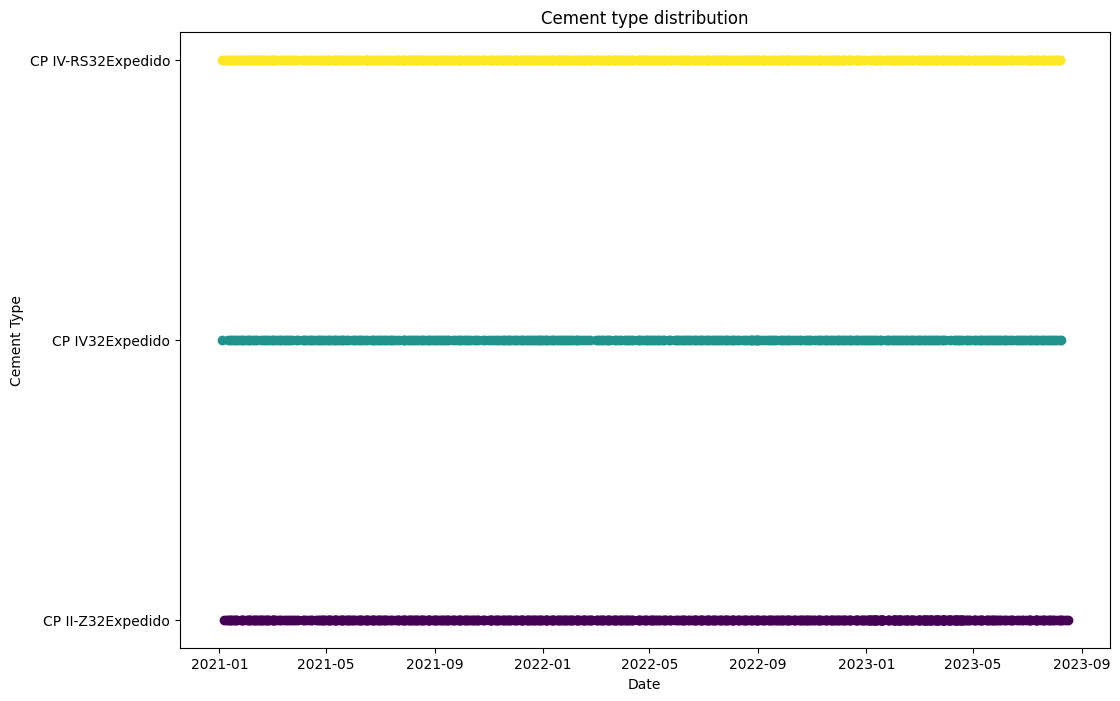

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP II-Z32Expedido
CP IV32Expedido
CP IV-RS32Expedido


<IPython.core.display.Javascript object>

In [39]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [40]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP II-Z-32     660
CP IV-32       378
CP IV-32 RS    584
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_3752397/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


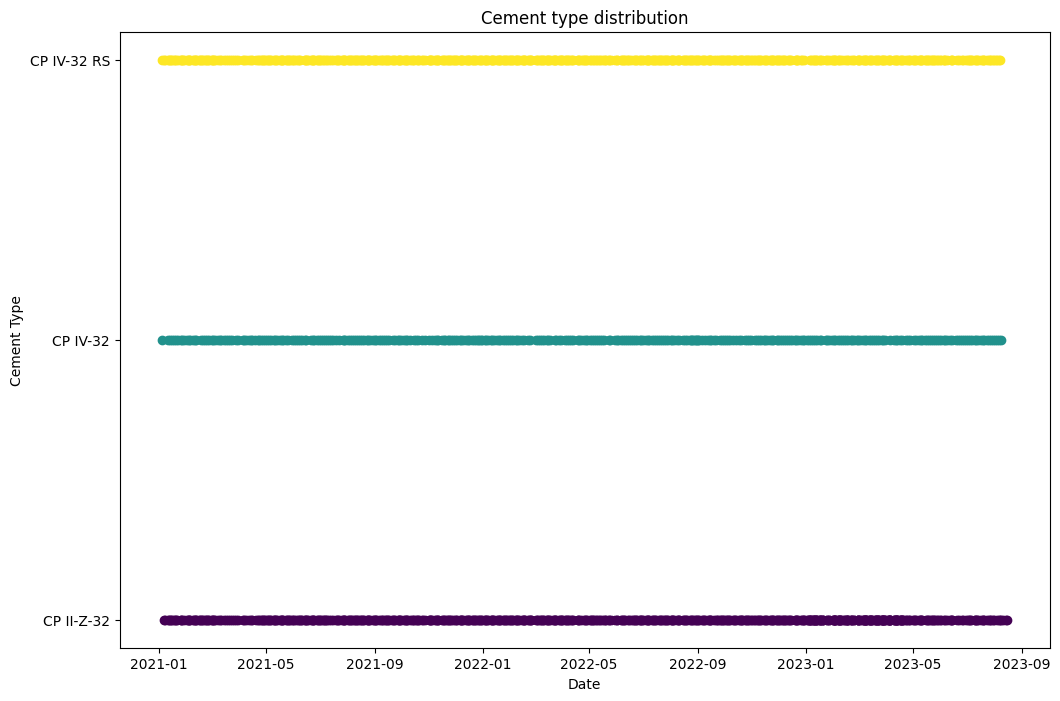

<IPython.core.display.Javascript object>

In [41]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [42]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

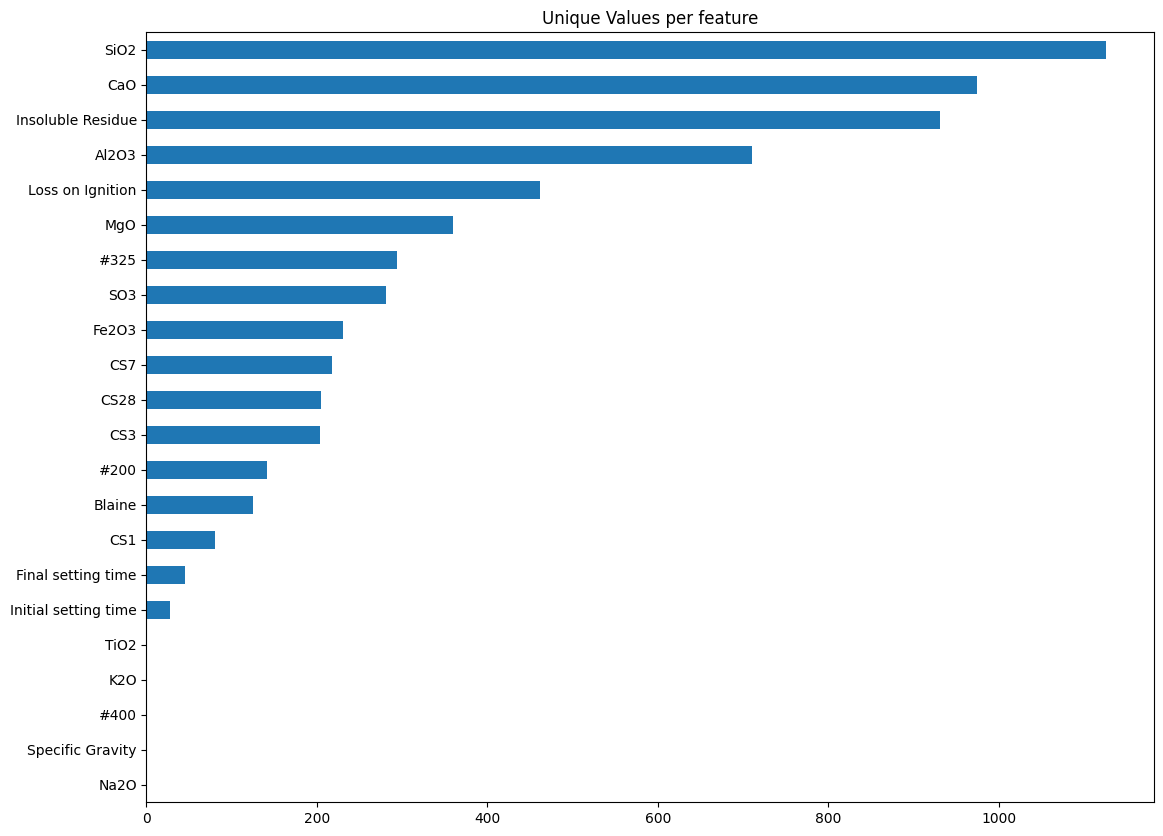

<IPython.core.display.Javascript object>

In [43]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

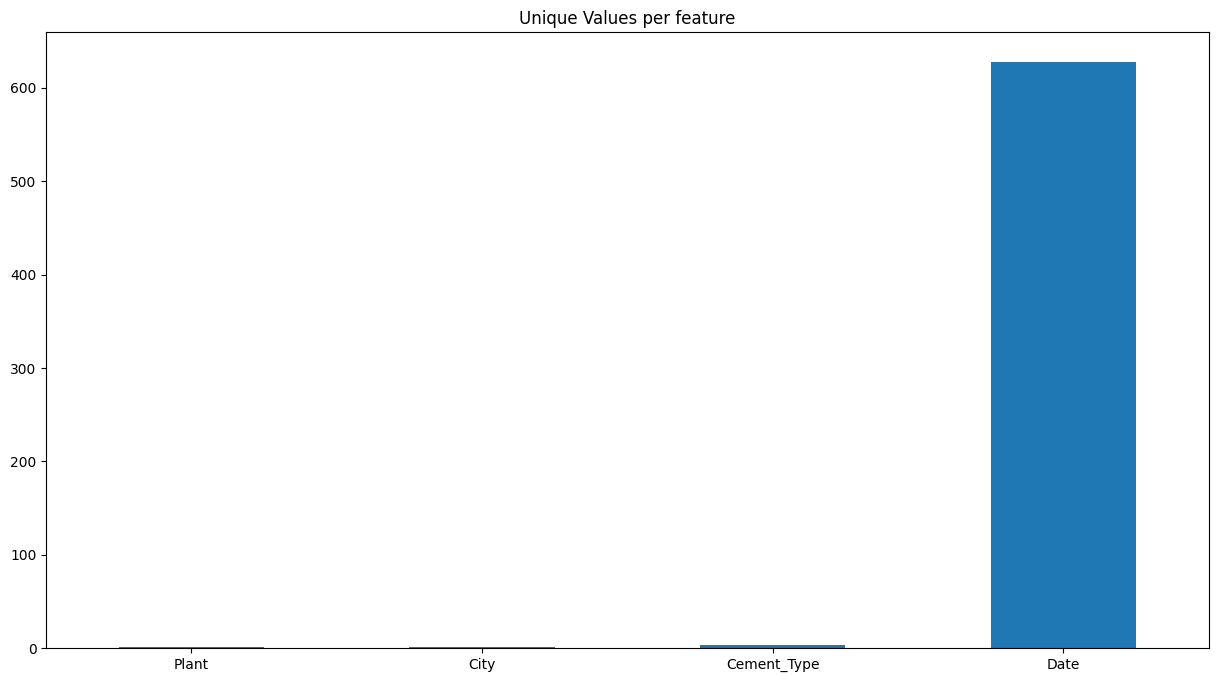

<IPython.core.display.Javascript object>

In [44]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

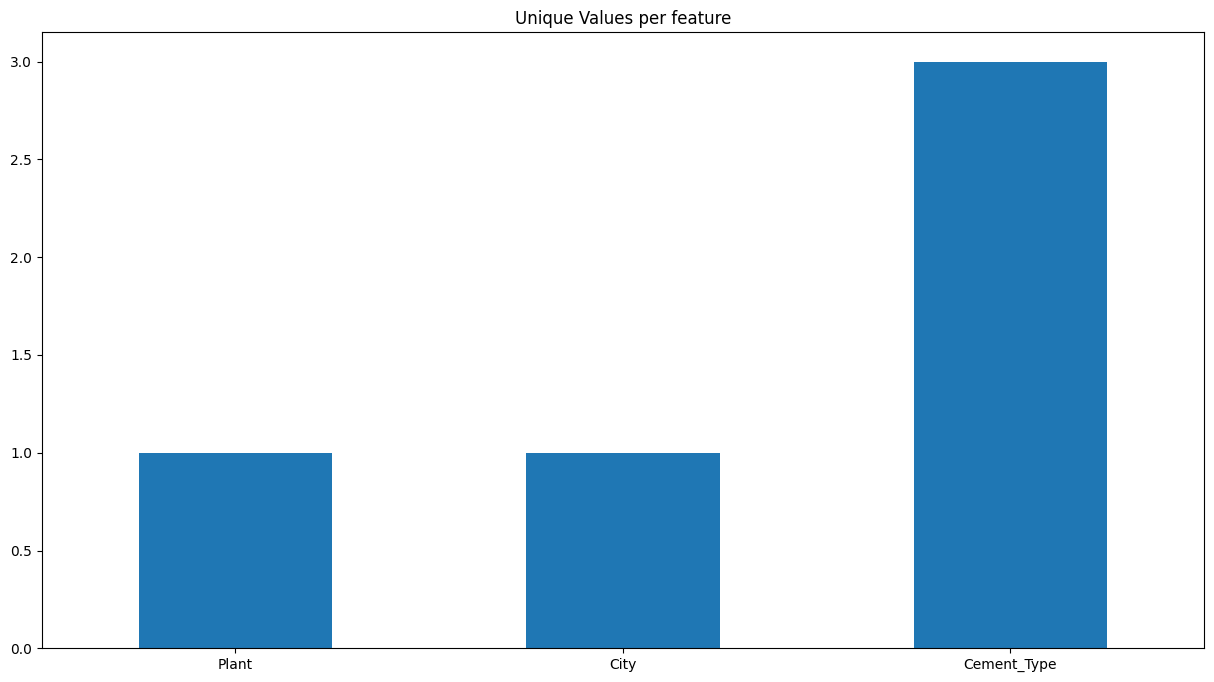

<IPython.core.display.Javascript object>

In [45]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [46]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 19 variables with missing values from a total of 26


<IPython.core.display.Javascript object>

In [47]:
df.isna().any()

Plant                   False
City                    False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                  False
#200                     True
#325                    False
#400                     True
Specific Gravity         True
Initial setting time     True
Final setting time       True
CS1                      True
CS3                     False
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [48]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [49]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 26 artists>

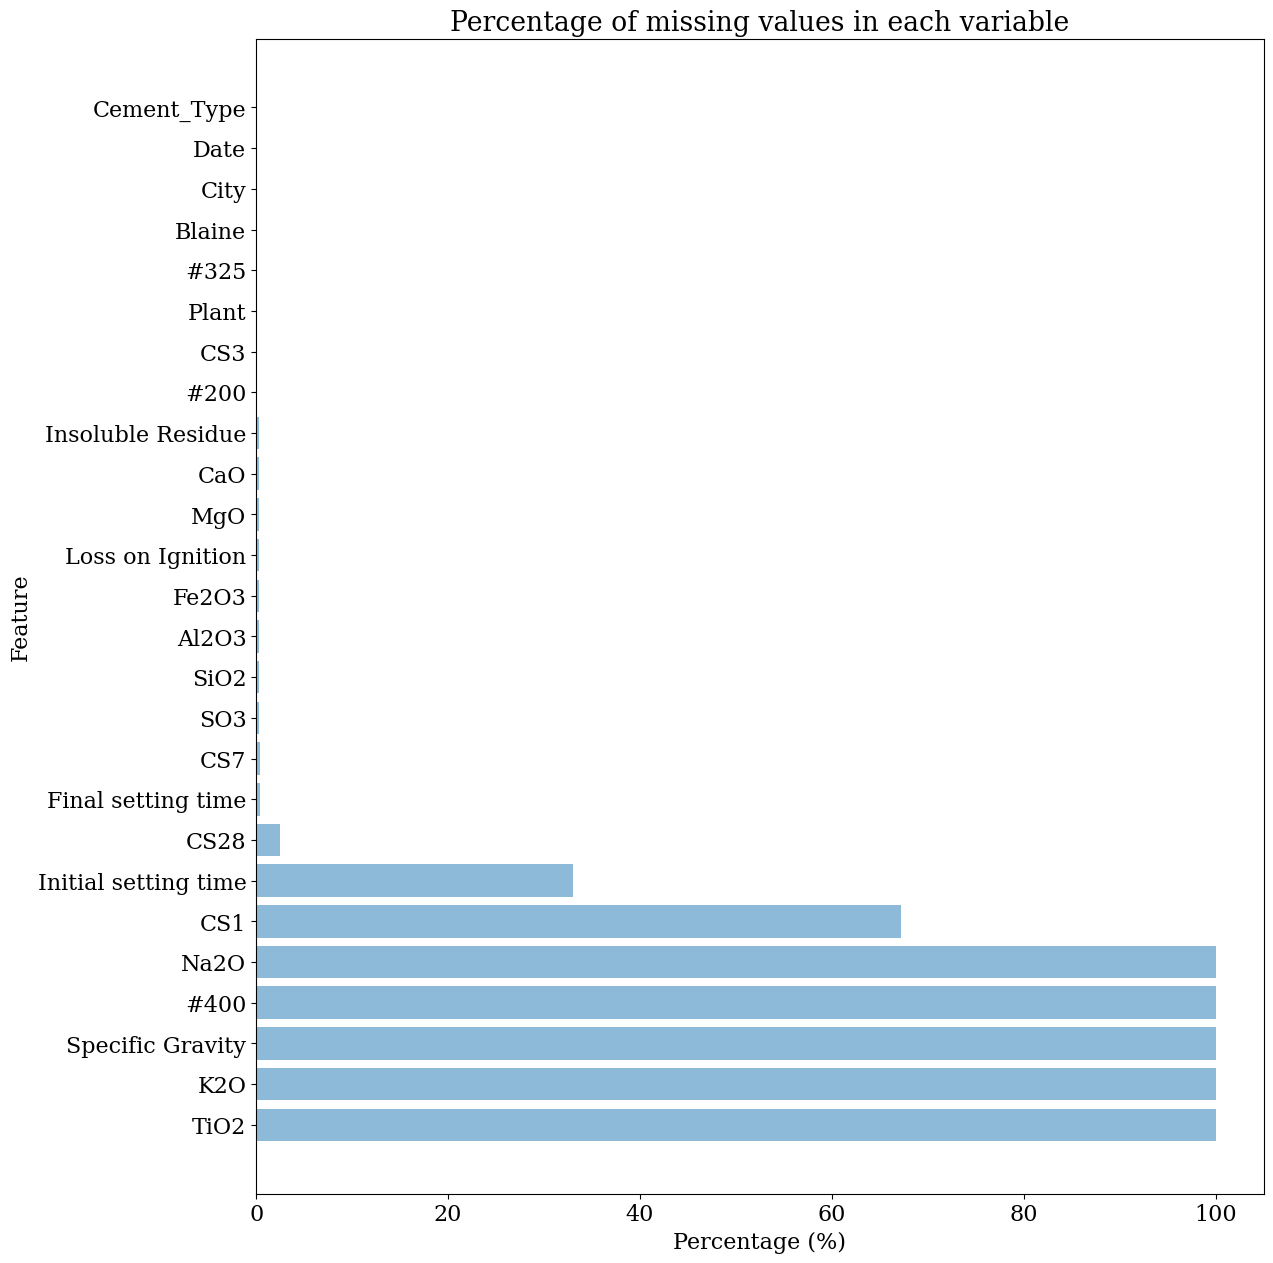

<IPython.core.display.Javascript object>

In [50]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [51]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [52]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['CaO', 'MgO', 'Na2O', 'Al2O3', 'SiO2', 'SO3', 'K2O', 'TiO2', 'Fe2O3',
       'Loss on Ignition', 'Insoluble Residue', 'Blaine', '#200', '#325',
       '#400', 'Specific Gravity', 'Initial setting time',
       'Final setting time', 'CS1', 'CS3', 'CS7', 'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [53]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [54]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

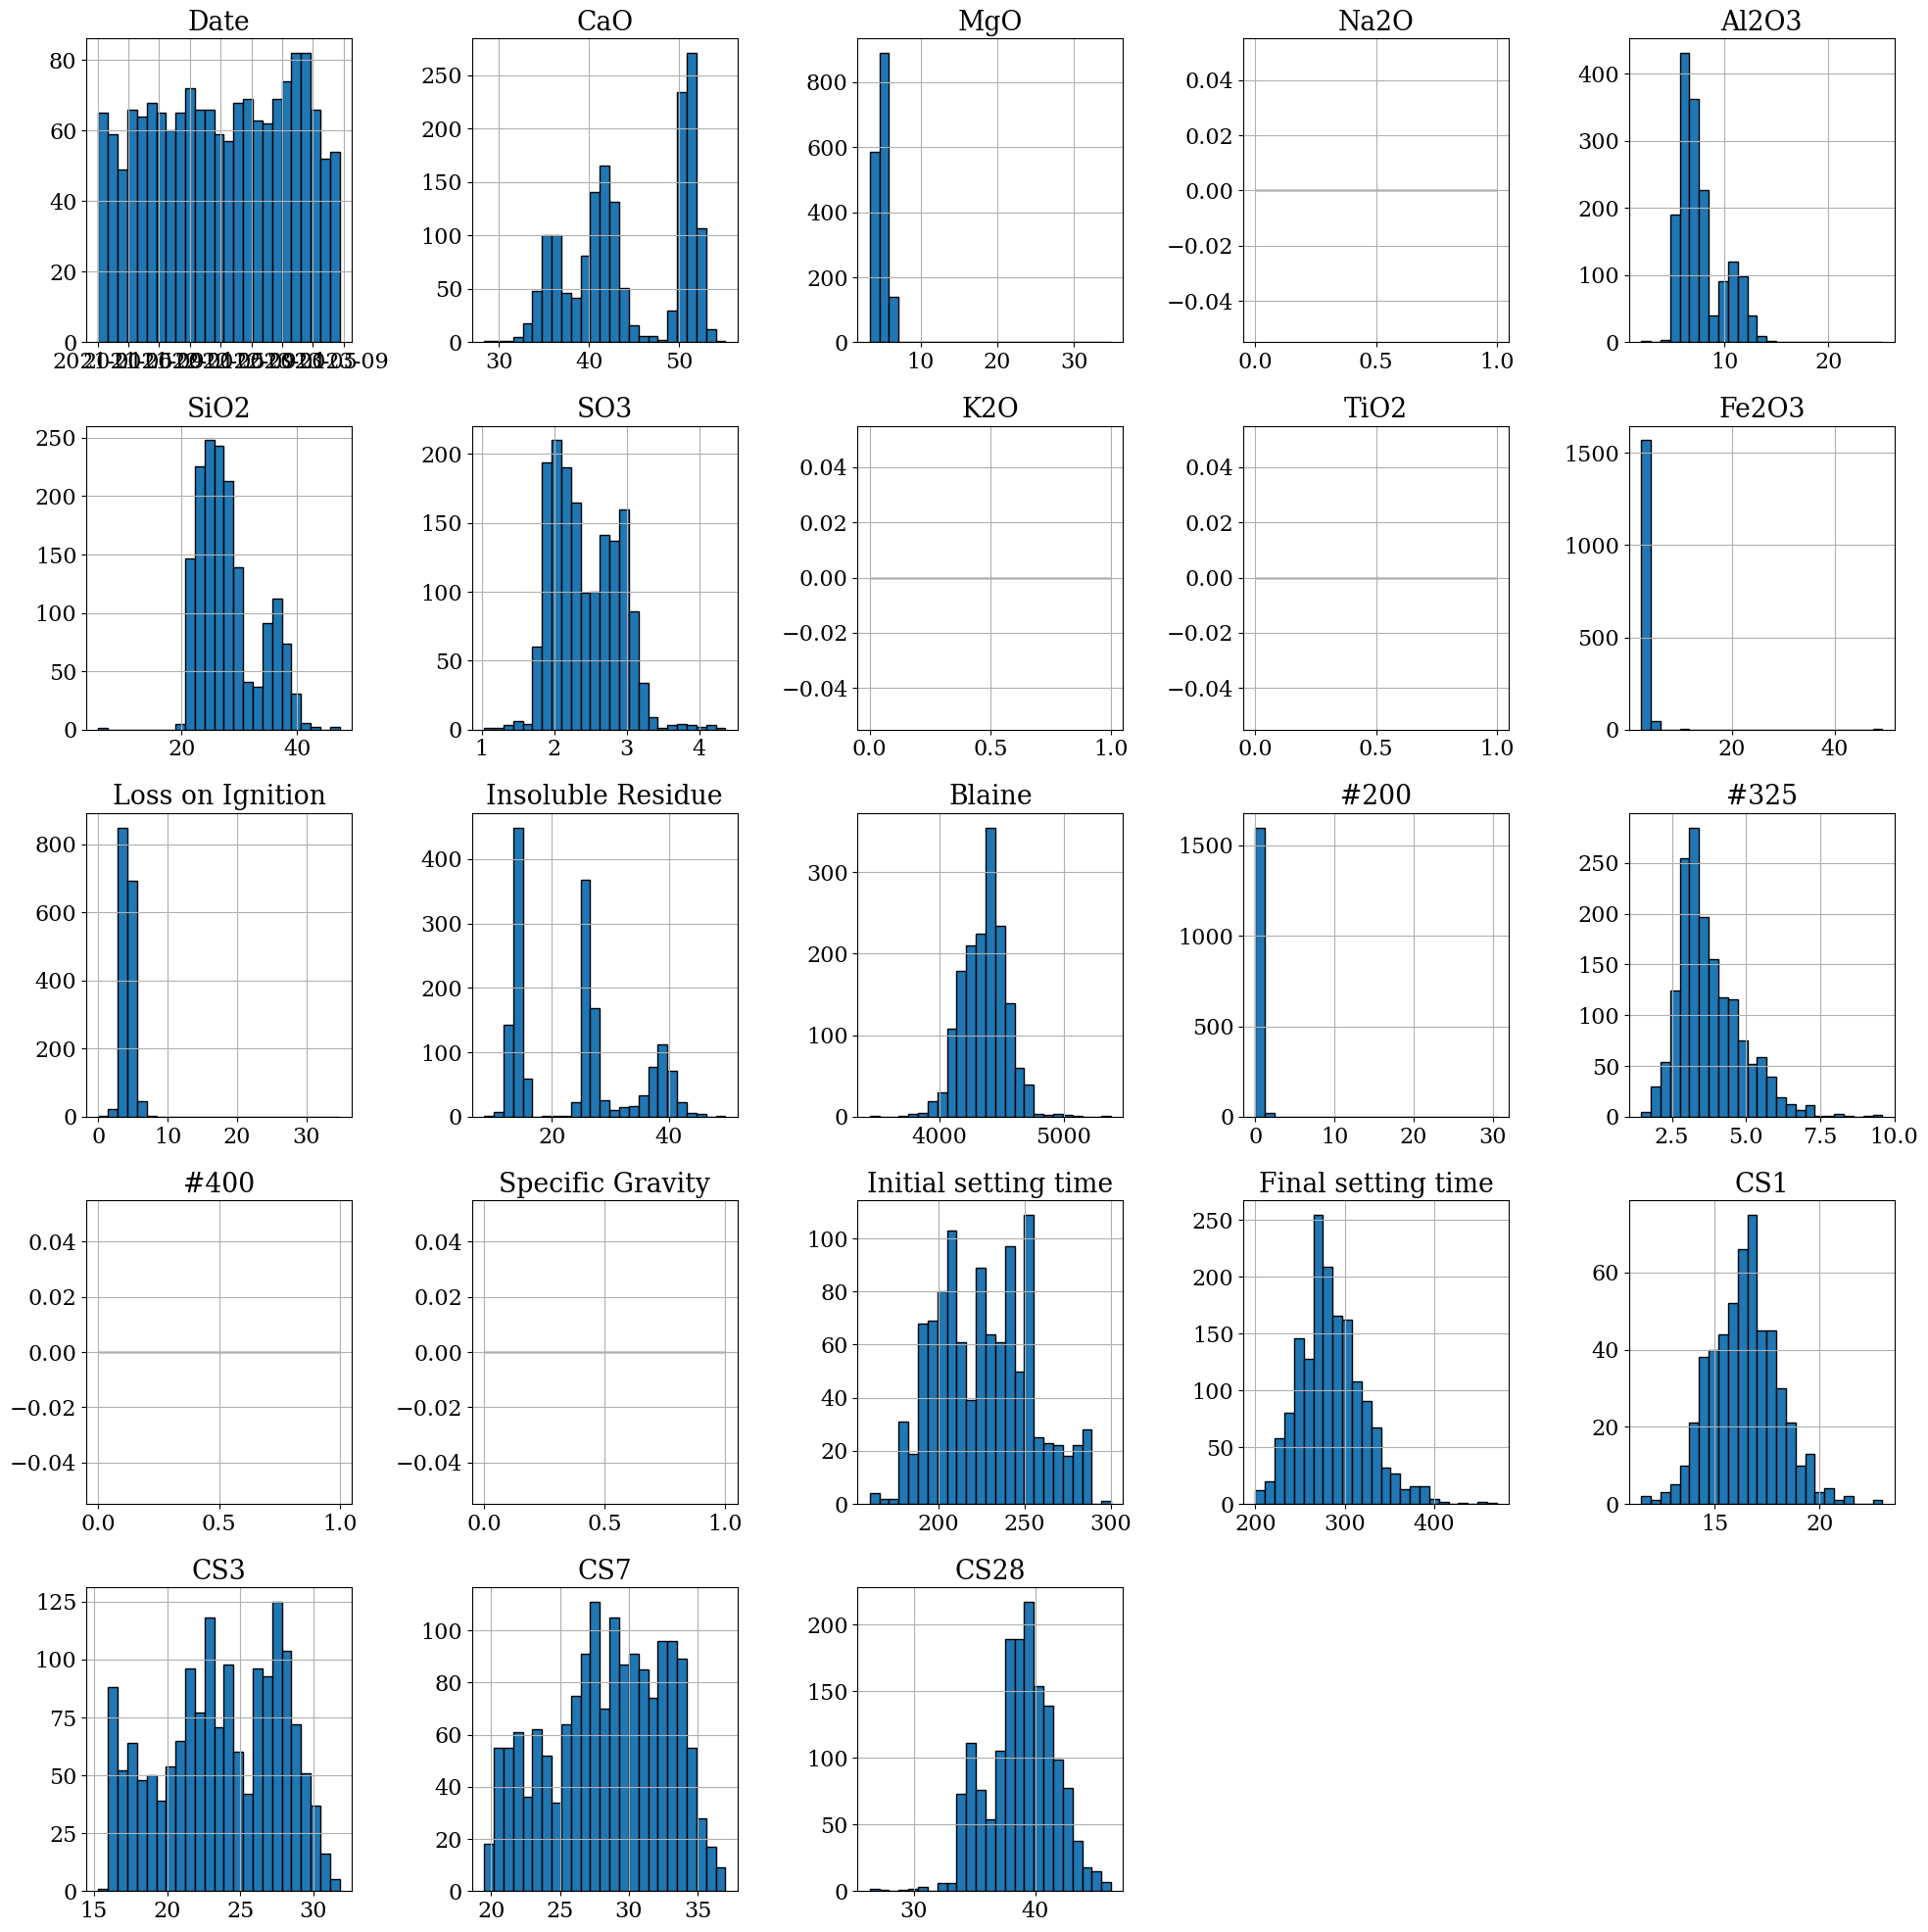

<IPython.core.display.Javascript object>

In [55]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

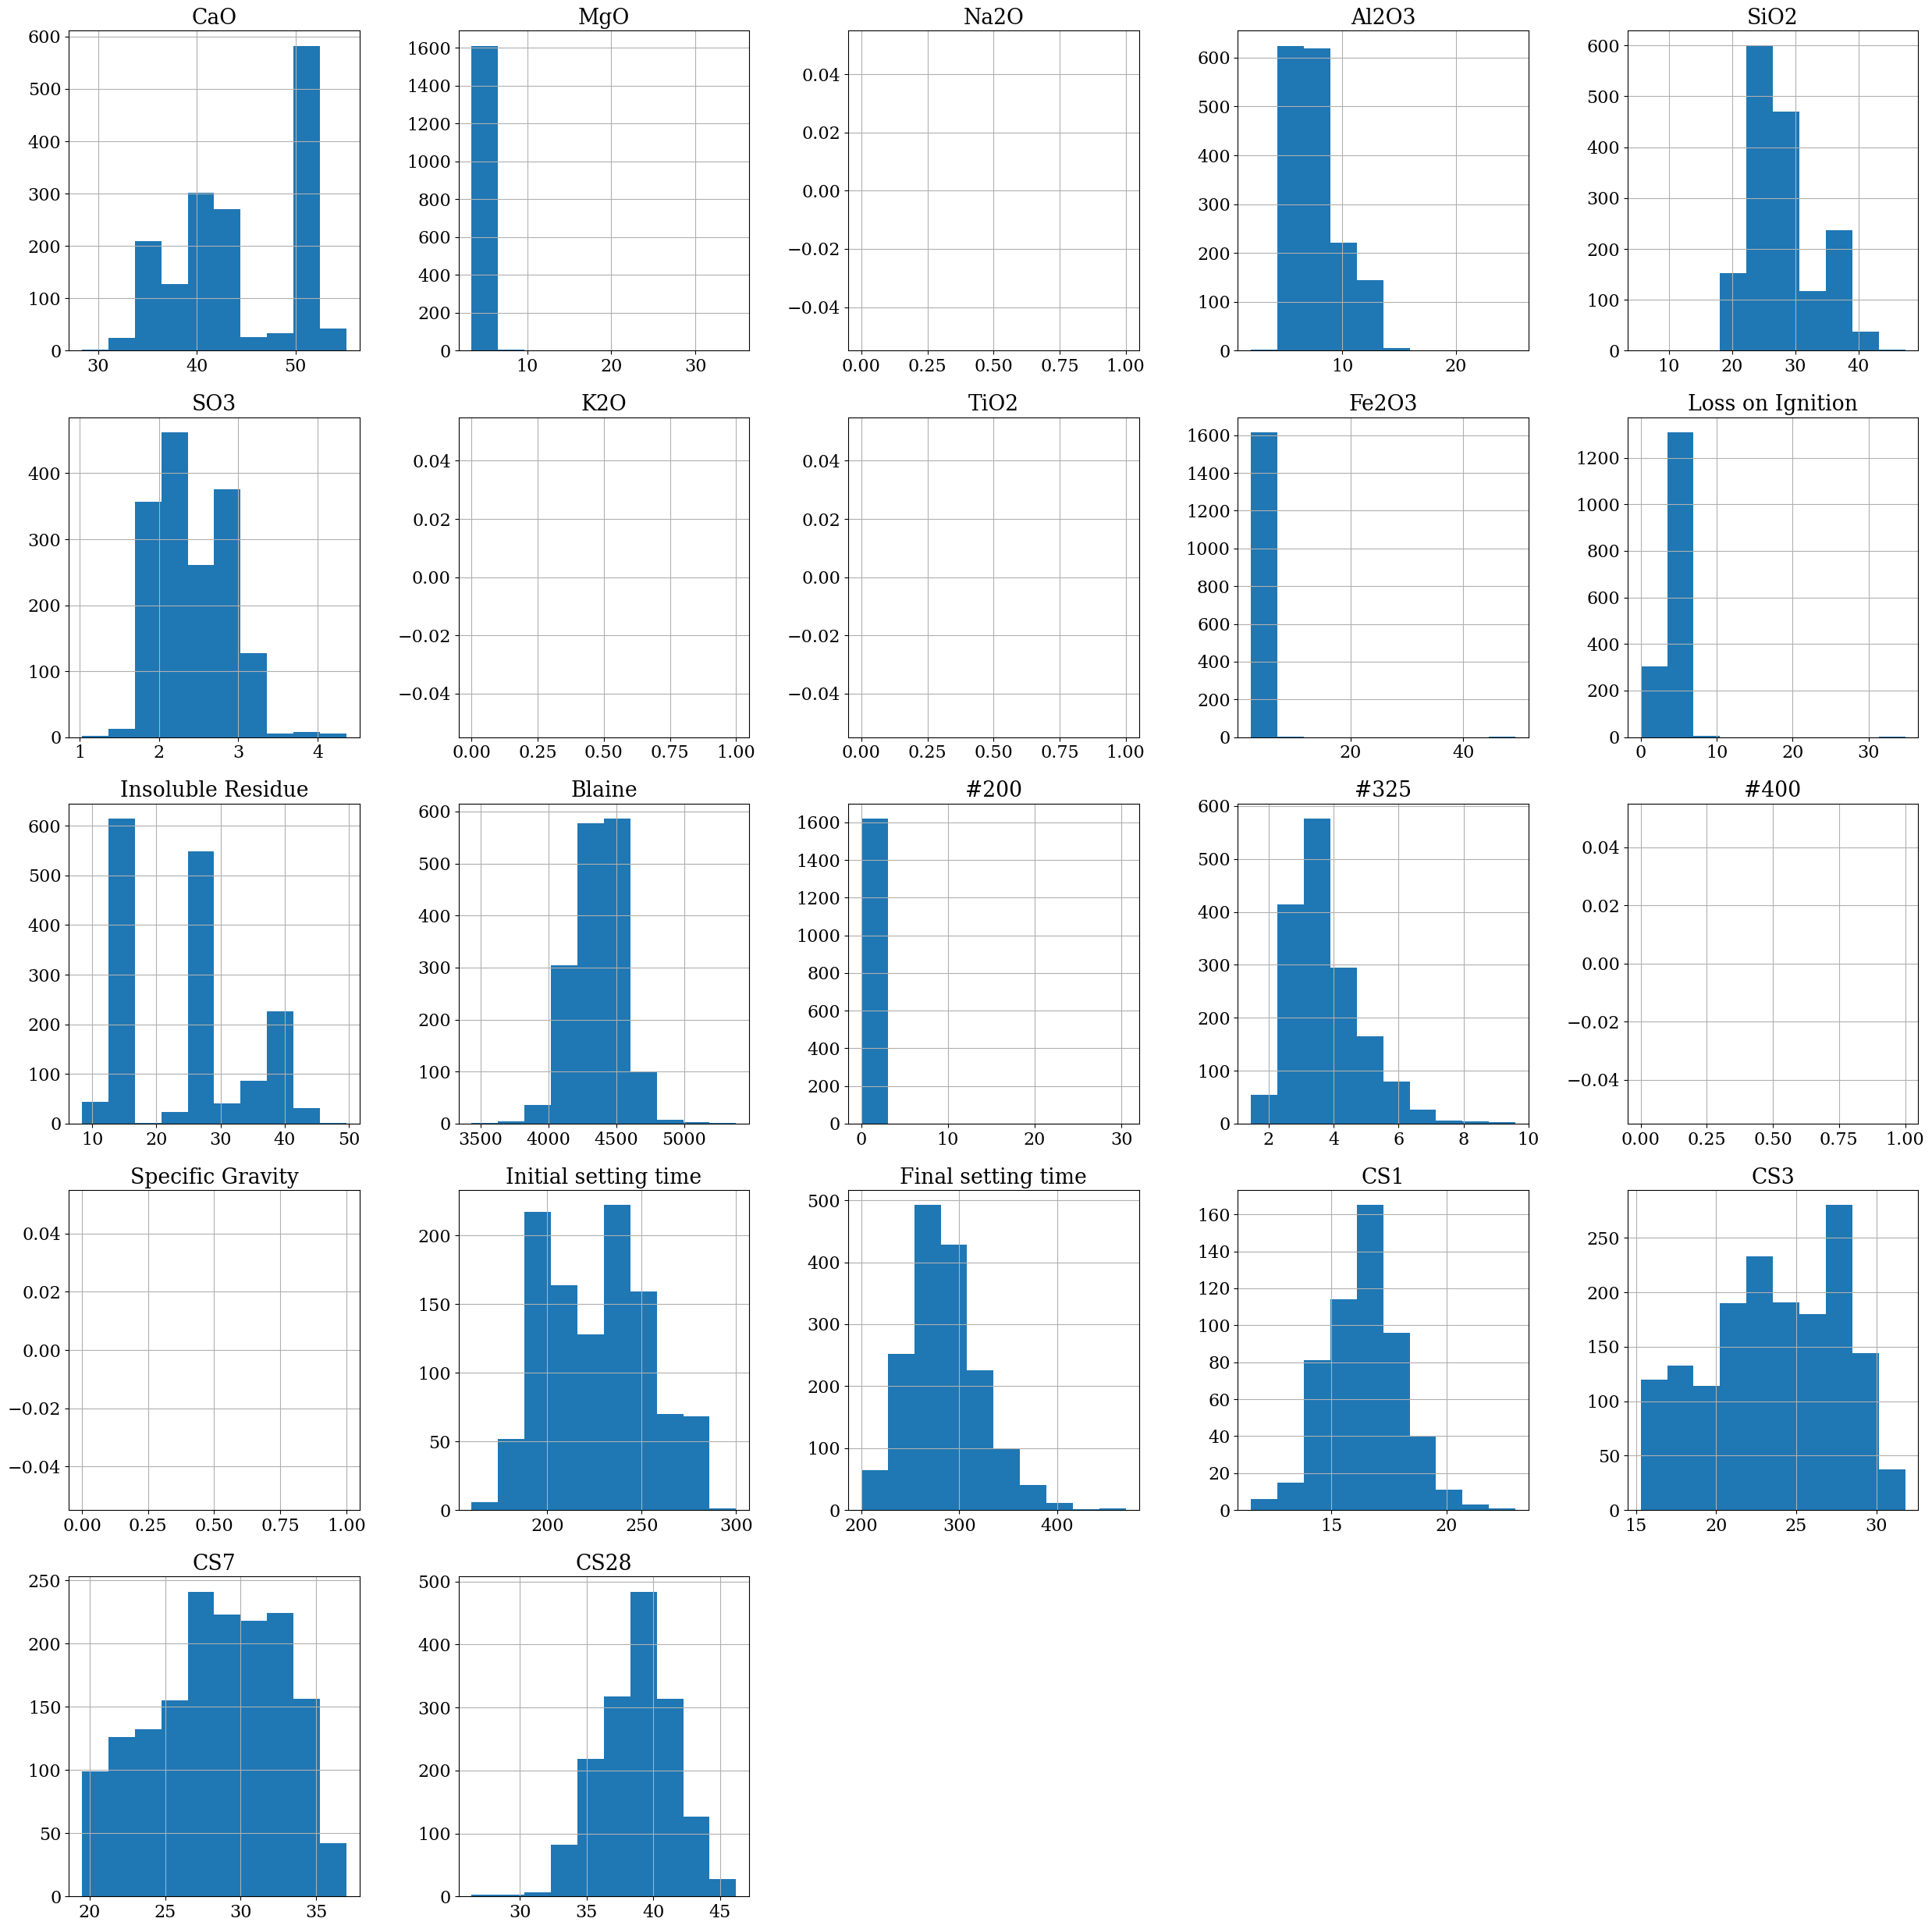

<IPython.core.display.Javascript object>

In [56]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

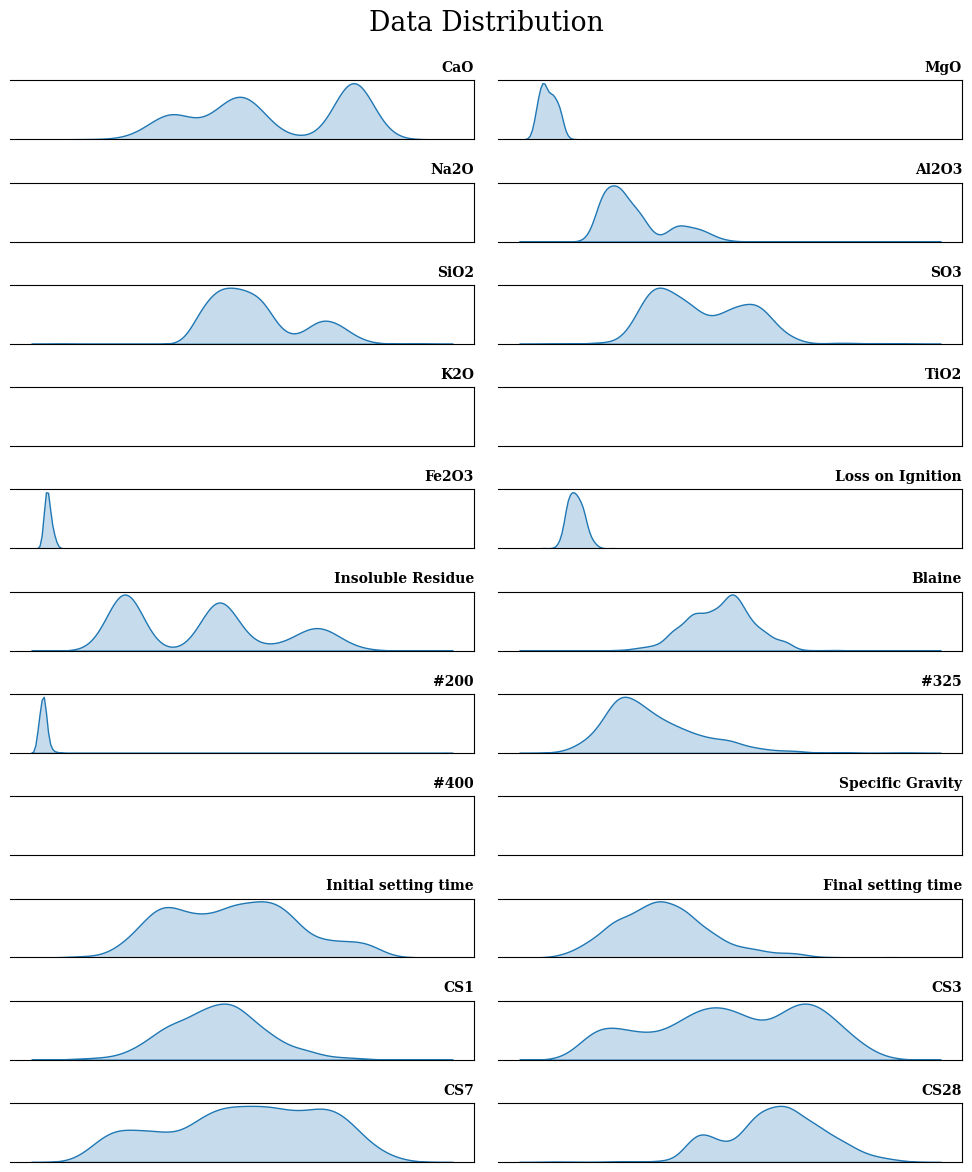

<IPython.core.display.Javascript object>

In [57]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(11, 2, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").select_dtypes(exclude=object).columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

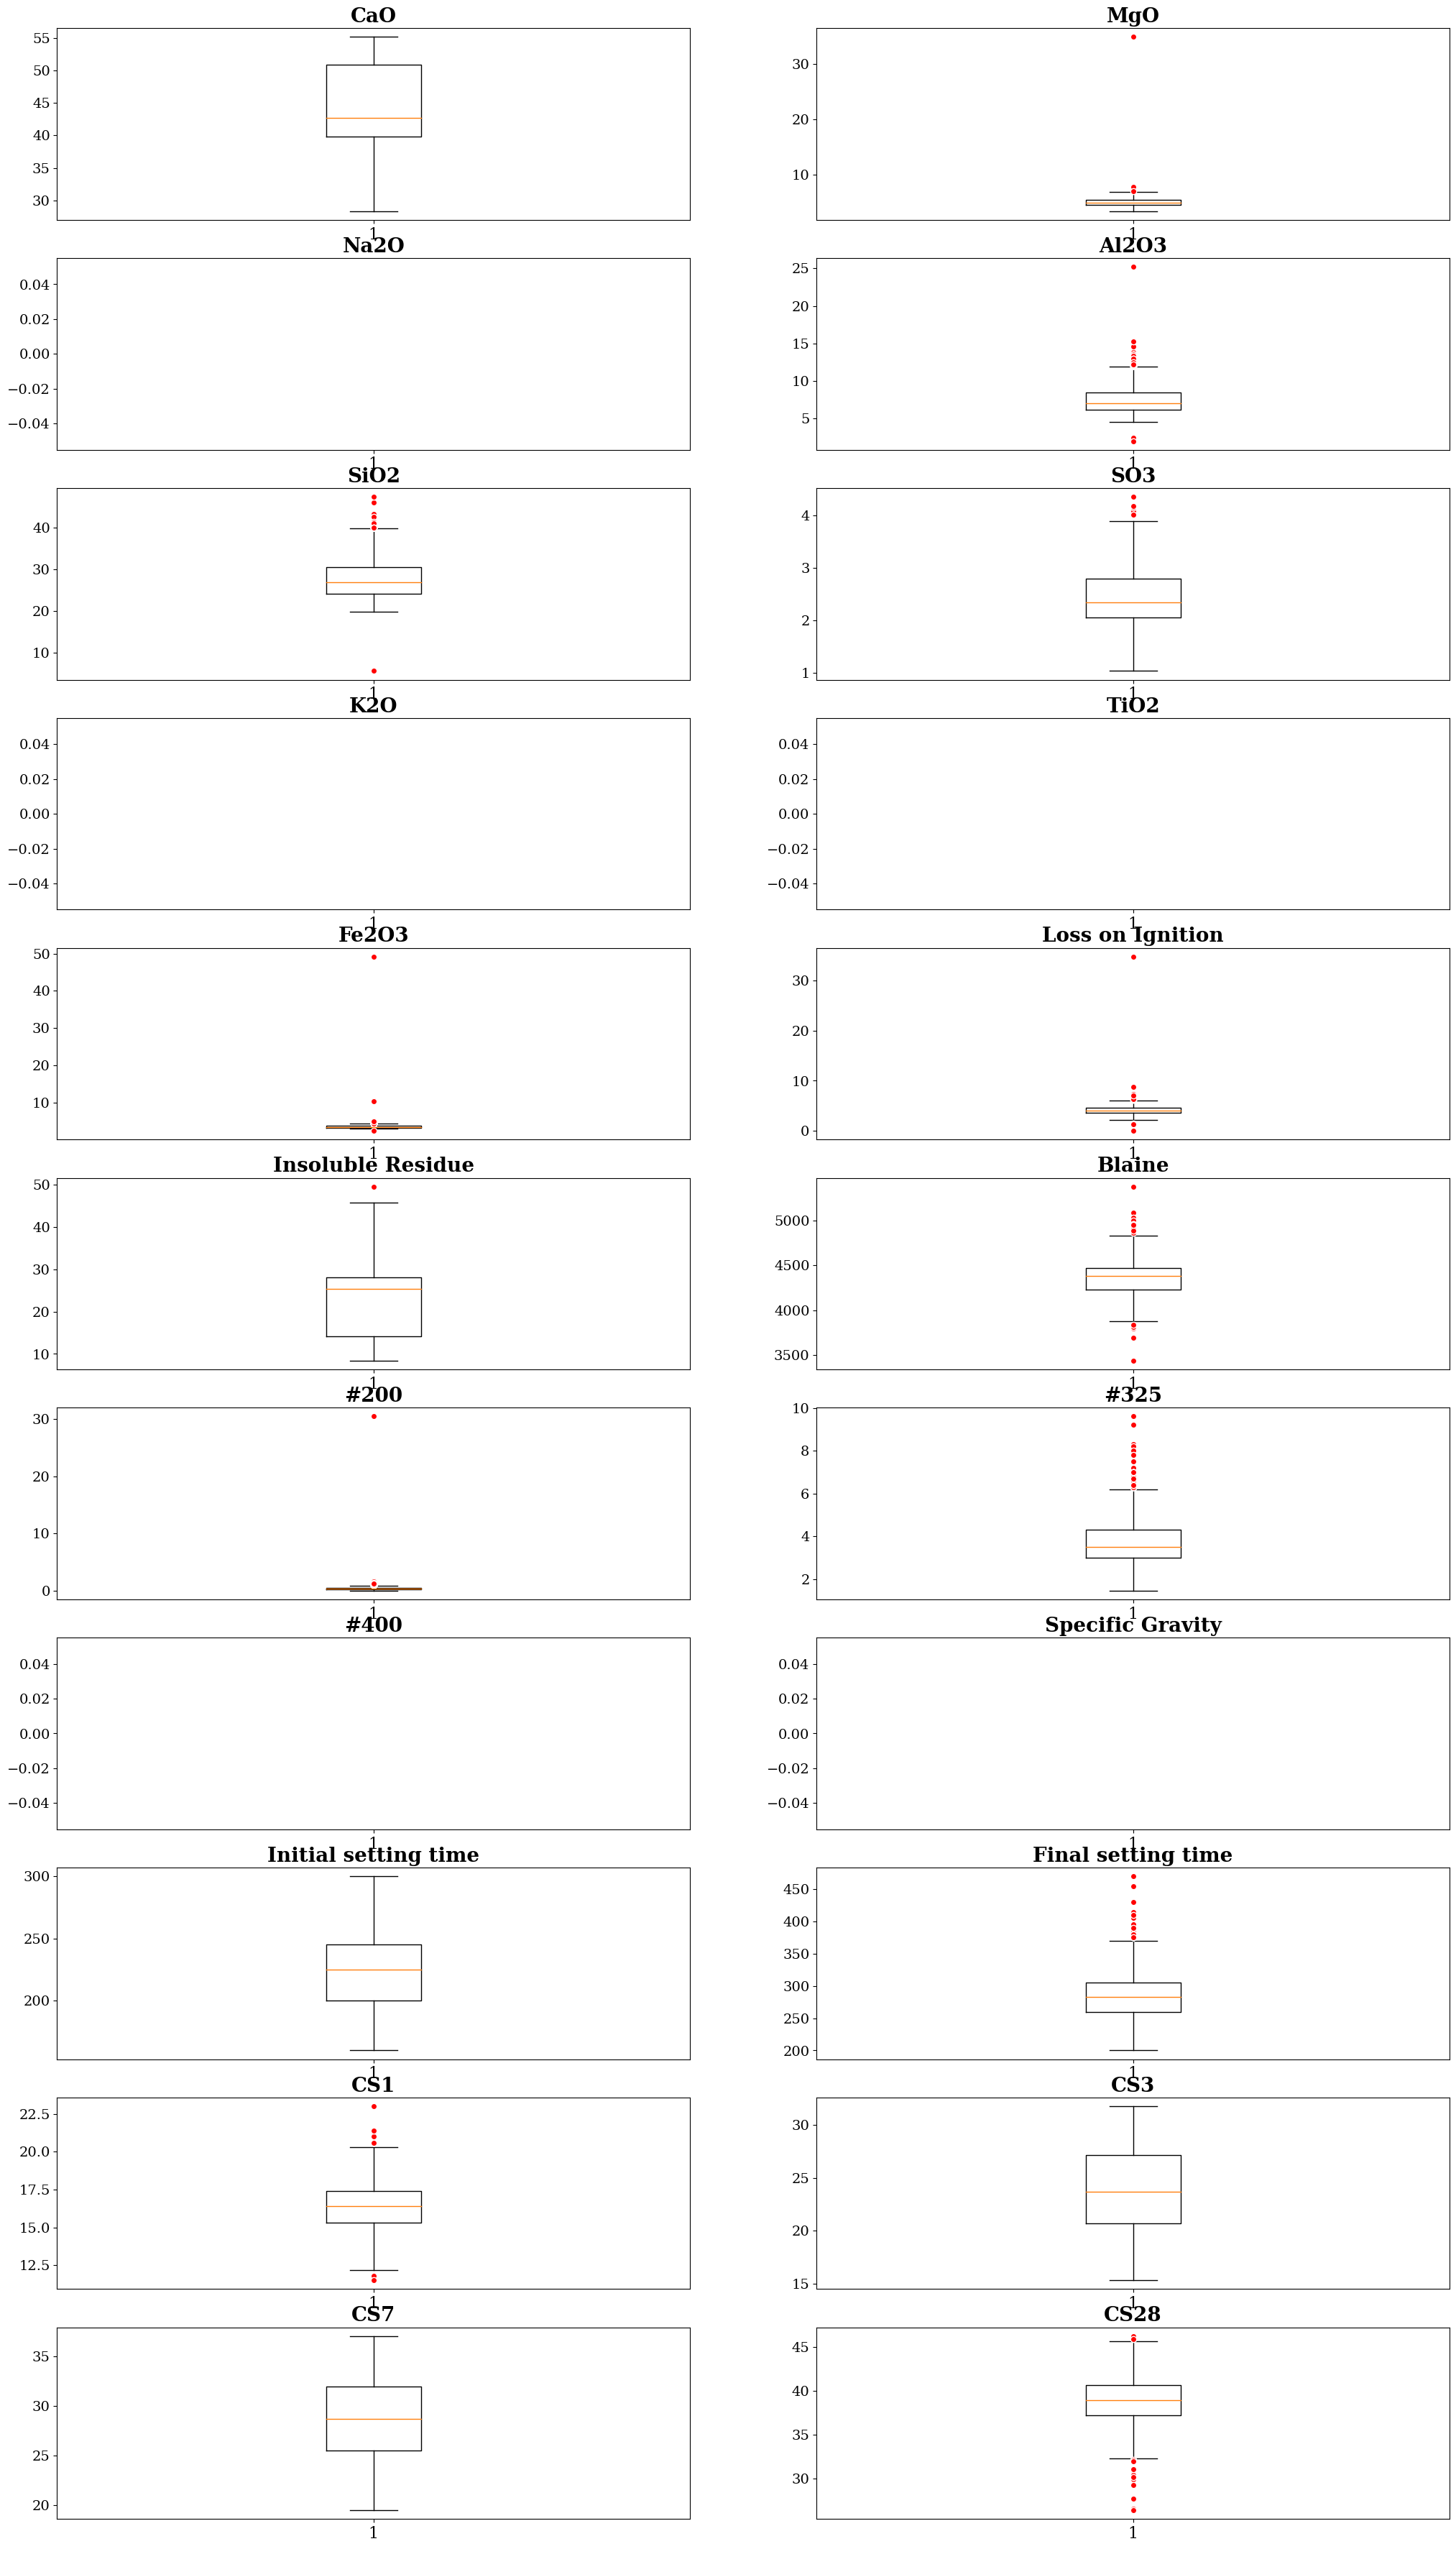

<IPython.core.display.Javascript object>

In [58]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(11, 2, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

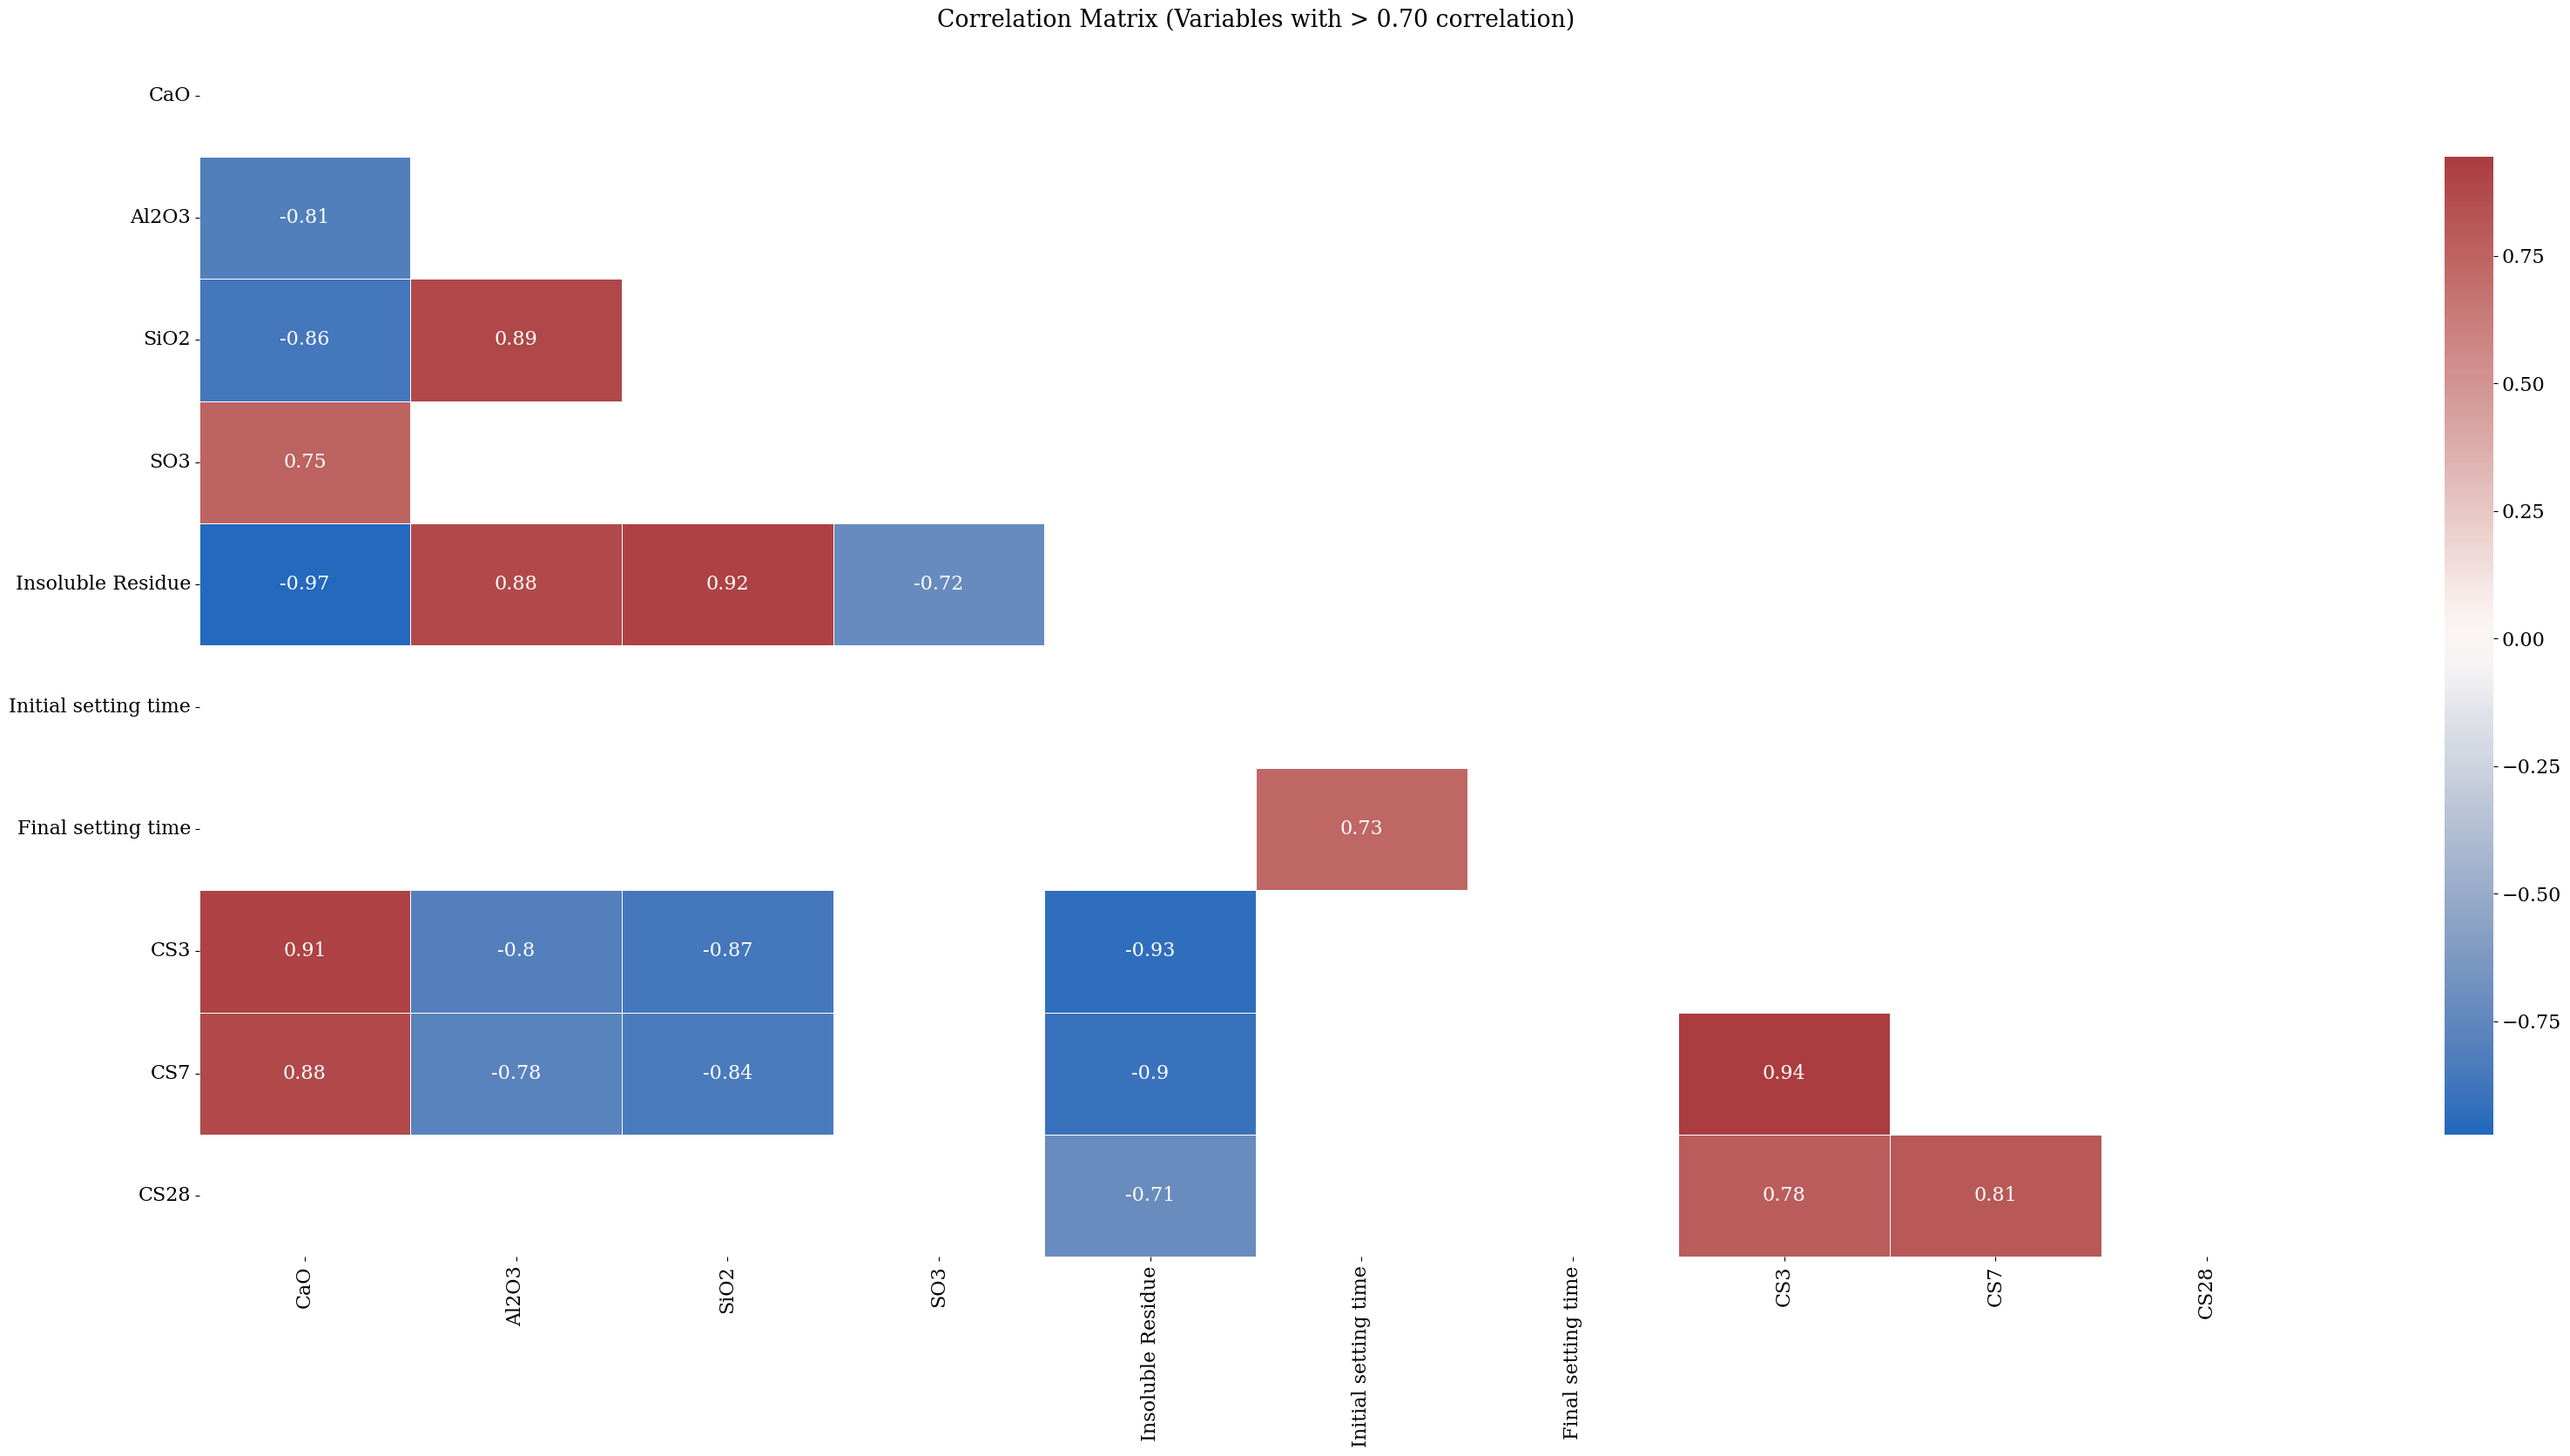

<IPython.core.display.Javascript object>

In [59]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [60]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CaO                   Insoluble Residue     0.972081
CS3                   CS7                   0.944929
Insoluble Residue     CS3                   0.930058
SiO2                  Insoluble Residue     0.921687
CaO                   CS3                   0.912492
Insoluble Residue     CS7                   0.898288
Al2O3                 SiO2                  0.892387
CaO                   CS7                   0.882721
Al2O3                 Insoluble Residue     0.881444
SiO2                  CS3                   0.865179
CaO                   SiO2                  0.859887
SiO2                  CS7                   0.840318
CaO                   Al2O3                 0.813753
CS7                   CS28                  0.806802
Al2O3                 CS3                   0.803681
                      CS7                   0.784047
CS3                   CS28                  0.782496
CaO                   SO3                   0.752091
Initial setting time  Final setting time    0.

<IPython.core.display.Javascript object>

In [61]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.806802
CS3                   CS28    0.782496
Insoluble Residue     CS28    0.714271
SiO2                  CS28    0.694390
CaO                   CS28    0.680412
Al2O3                 CS28    0.664672
SO3                   CS28    0.501114
Initial setting time  CS28    0.396759
Final setting time    CS28    0.389538
CS1                   CS28    0.229166
MgO                   CS28    0.215447
Blaine                CS28    0.207615
Fe2O3                 CS28    0.161485
#325                  CS28    0.119044
Loss on Ignition      CS28    0.091979
#200                  CS28    0.022780
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

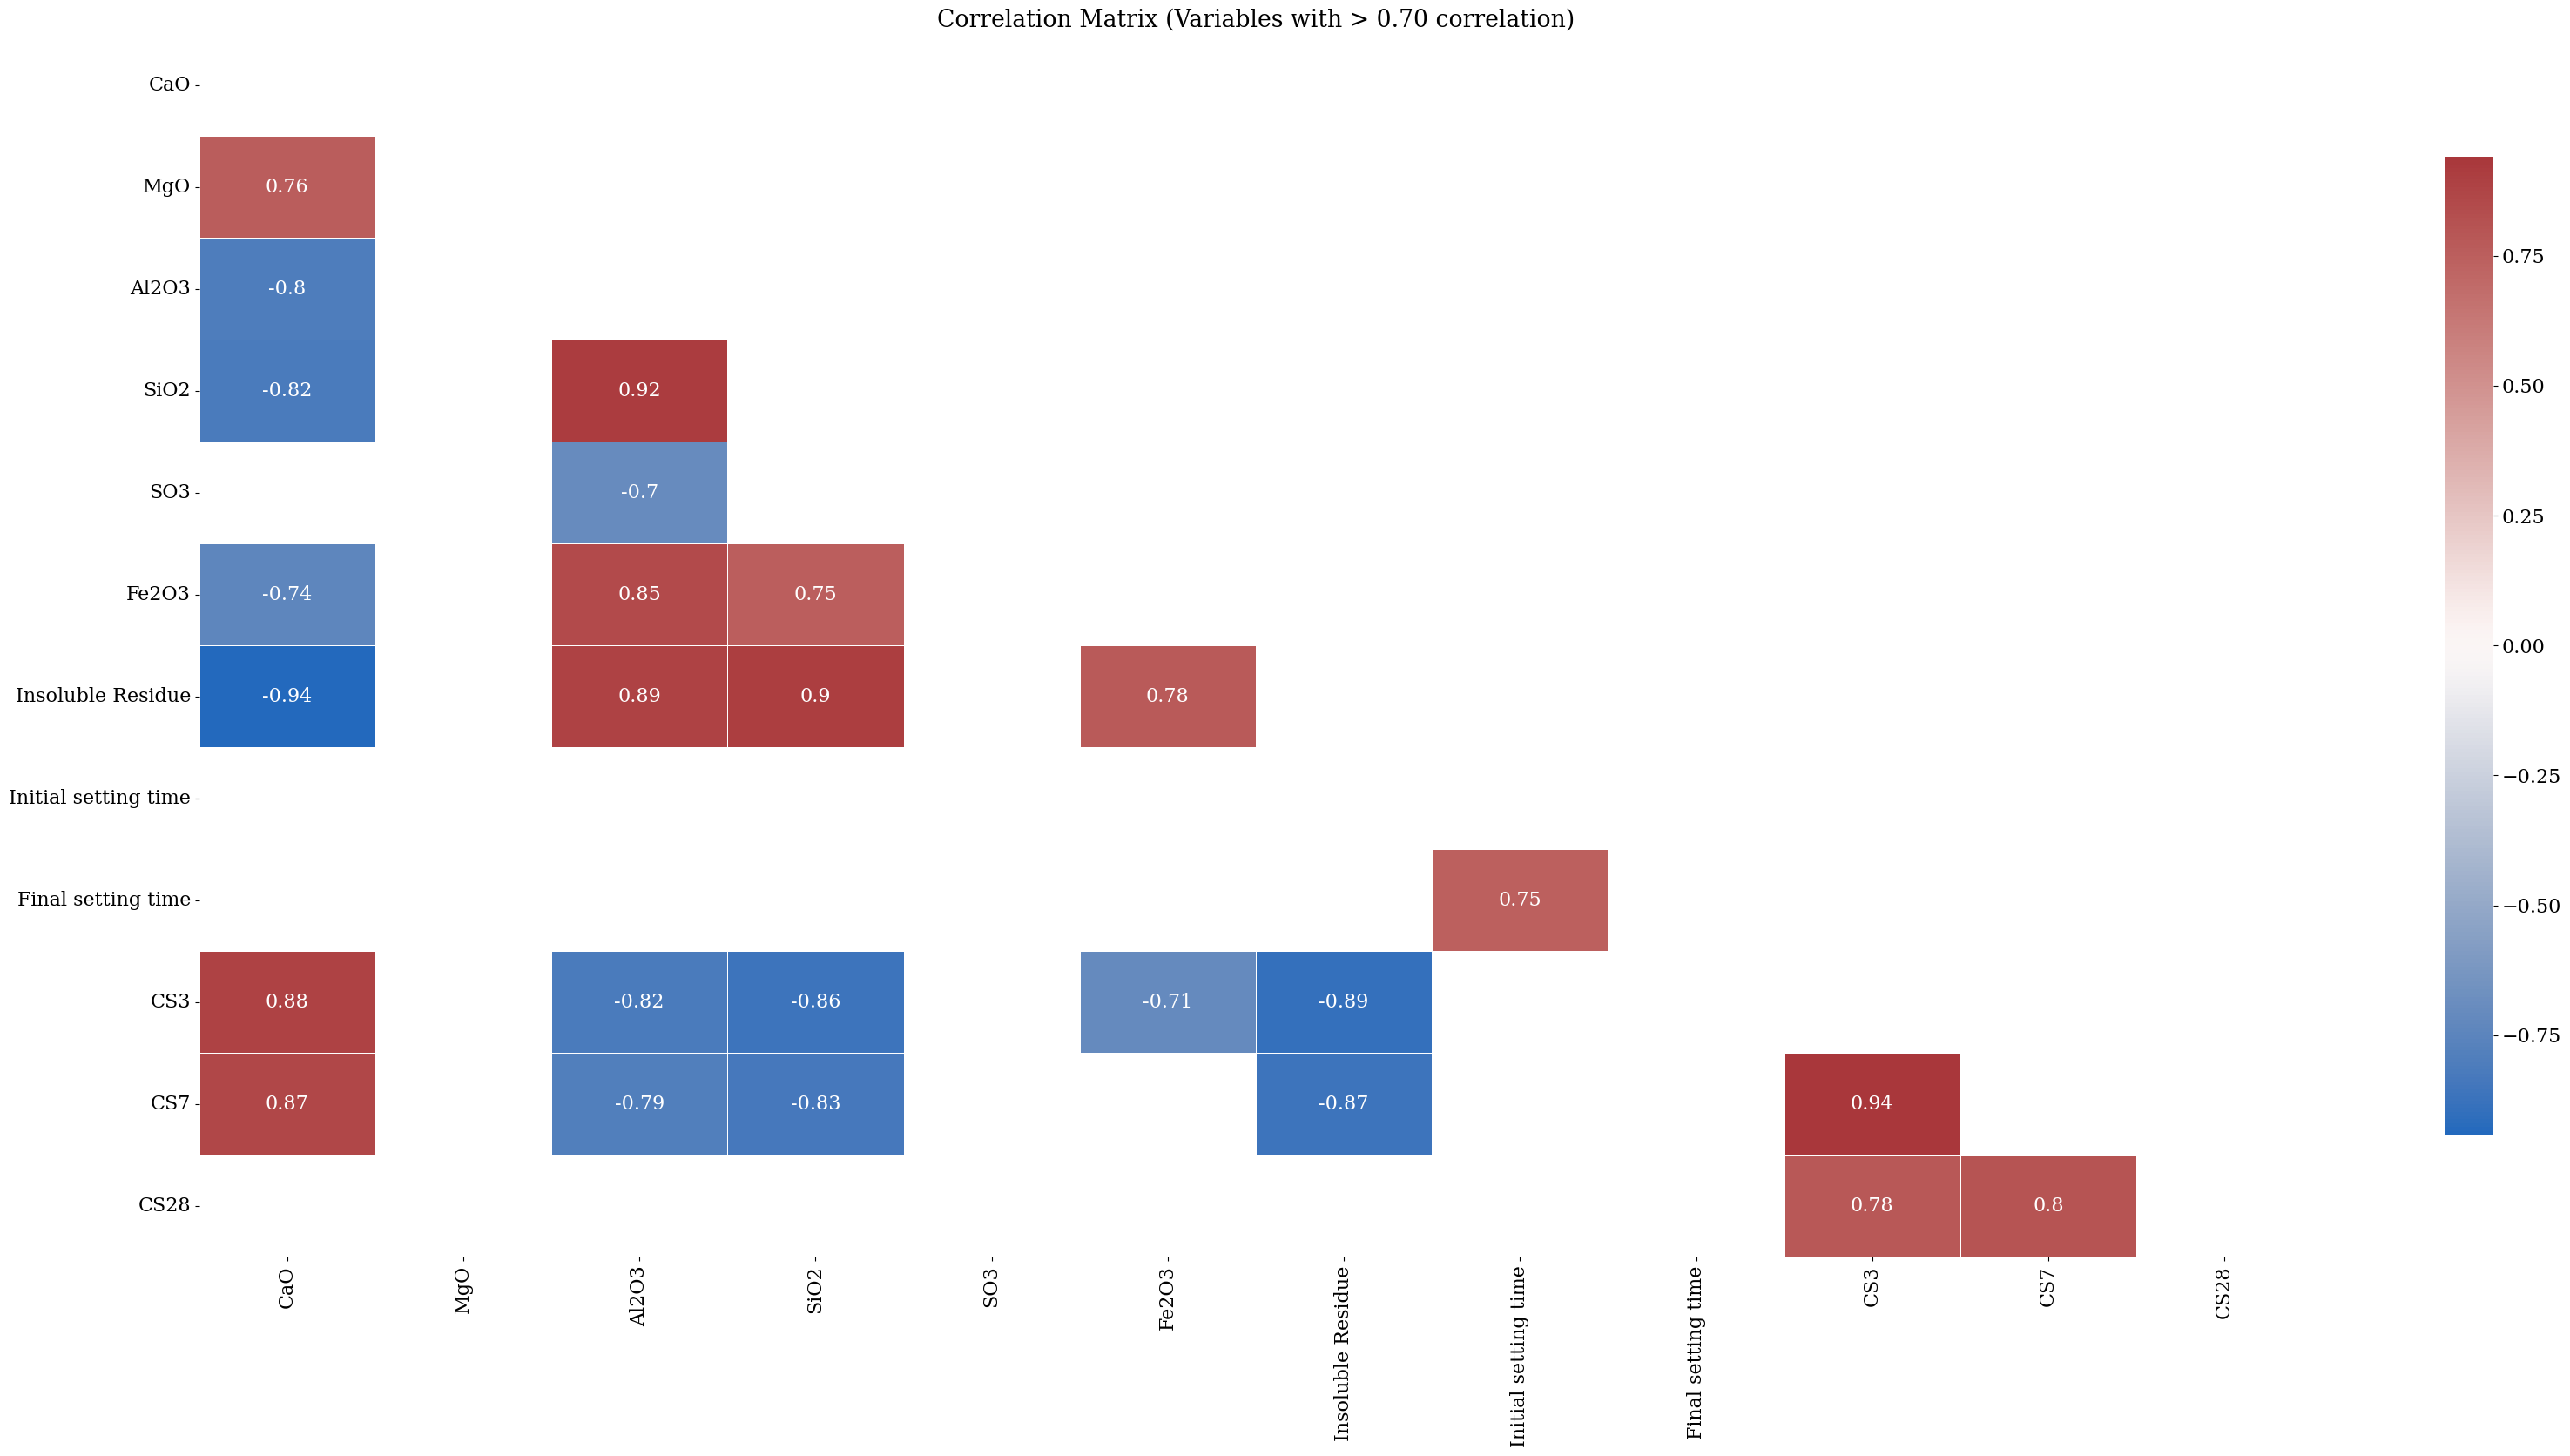

<IPython.core.display.Javascript object>

In [62]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [63]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CaO                   Insoluble Residue     0.941214
CS3                   CS7                   0.940950
Al2O3                 SiO2                  0.916479
SiO2                  Insoluble Residue     0.904866
Insoluble Residue     CS3                   0.894349
Al2O3                 Insoluble Residue     0.887981
CaO                   CS3                   0.883340
Insoluble Residue     CS7                   0.865752
CaO                   CS7                   0.865621
SiO2                  CS3                   0.861436
Al2O3                 Fe2O3                 0.847003
SiO2                  CS7                   0.832338
CaO                   SiO2                  0.821859
Al2O3                 CS3                   0.820580
CaO                   Al2O3                 0.804786
CS7                   CS28                  0.803630
Al2O3                 CS7                   0.792637
CS3                   CS28                  0.781230
Fe2O3                 Insoluble Residue     0.

<IPython.core.display.Javascript object>

In [64]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.803630
CS3                   CS28    0.781230
Insoluble Residue     CS28    0.685129
SiO2                  CS28    0.672063
CaO                   CS28    0.666957
Al2O3                 CS28    0.635536
Fe2O3                 CS28    0.561059
SO3                   CS28    0.506699
Initial setting time  CS28    0.414117
Final setting time    CS28    0.398172
MgO                   CS28    0.392745
CS1                   CS28    0.227808
Loss on Ignition      CS28    0.221507
Blaine                CS28    0.200146
#200                  CS28    0.180946
#325                  CS28    0.103735
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

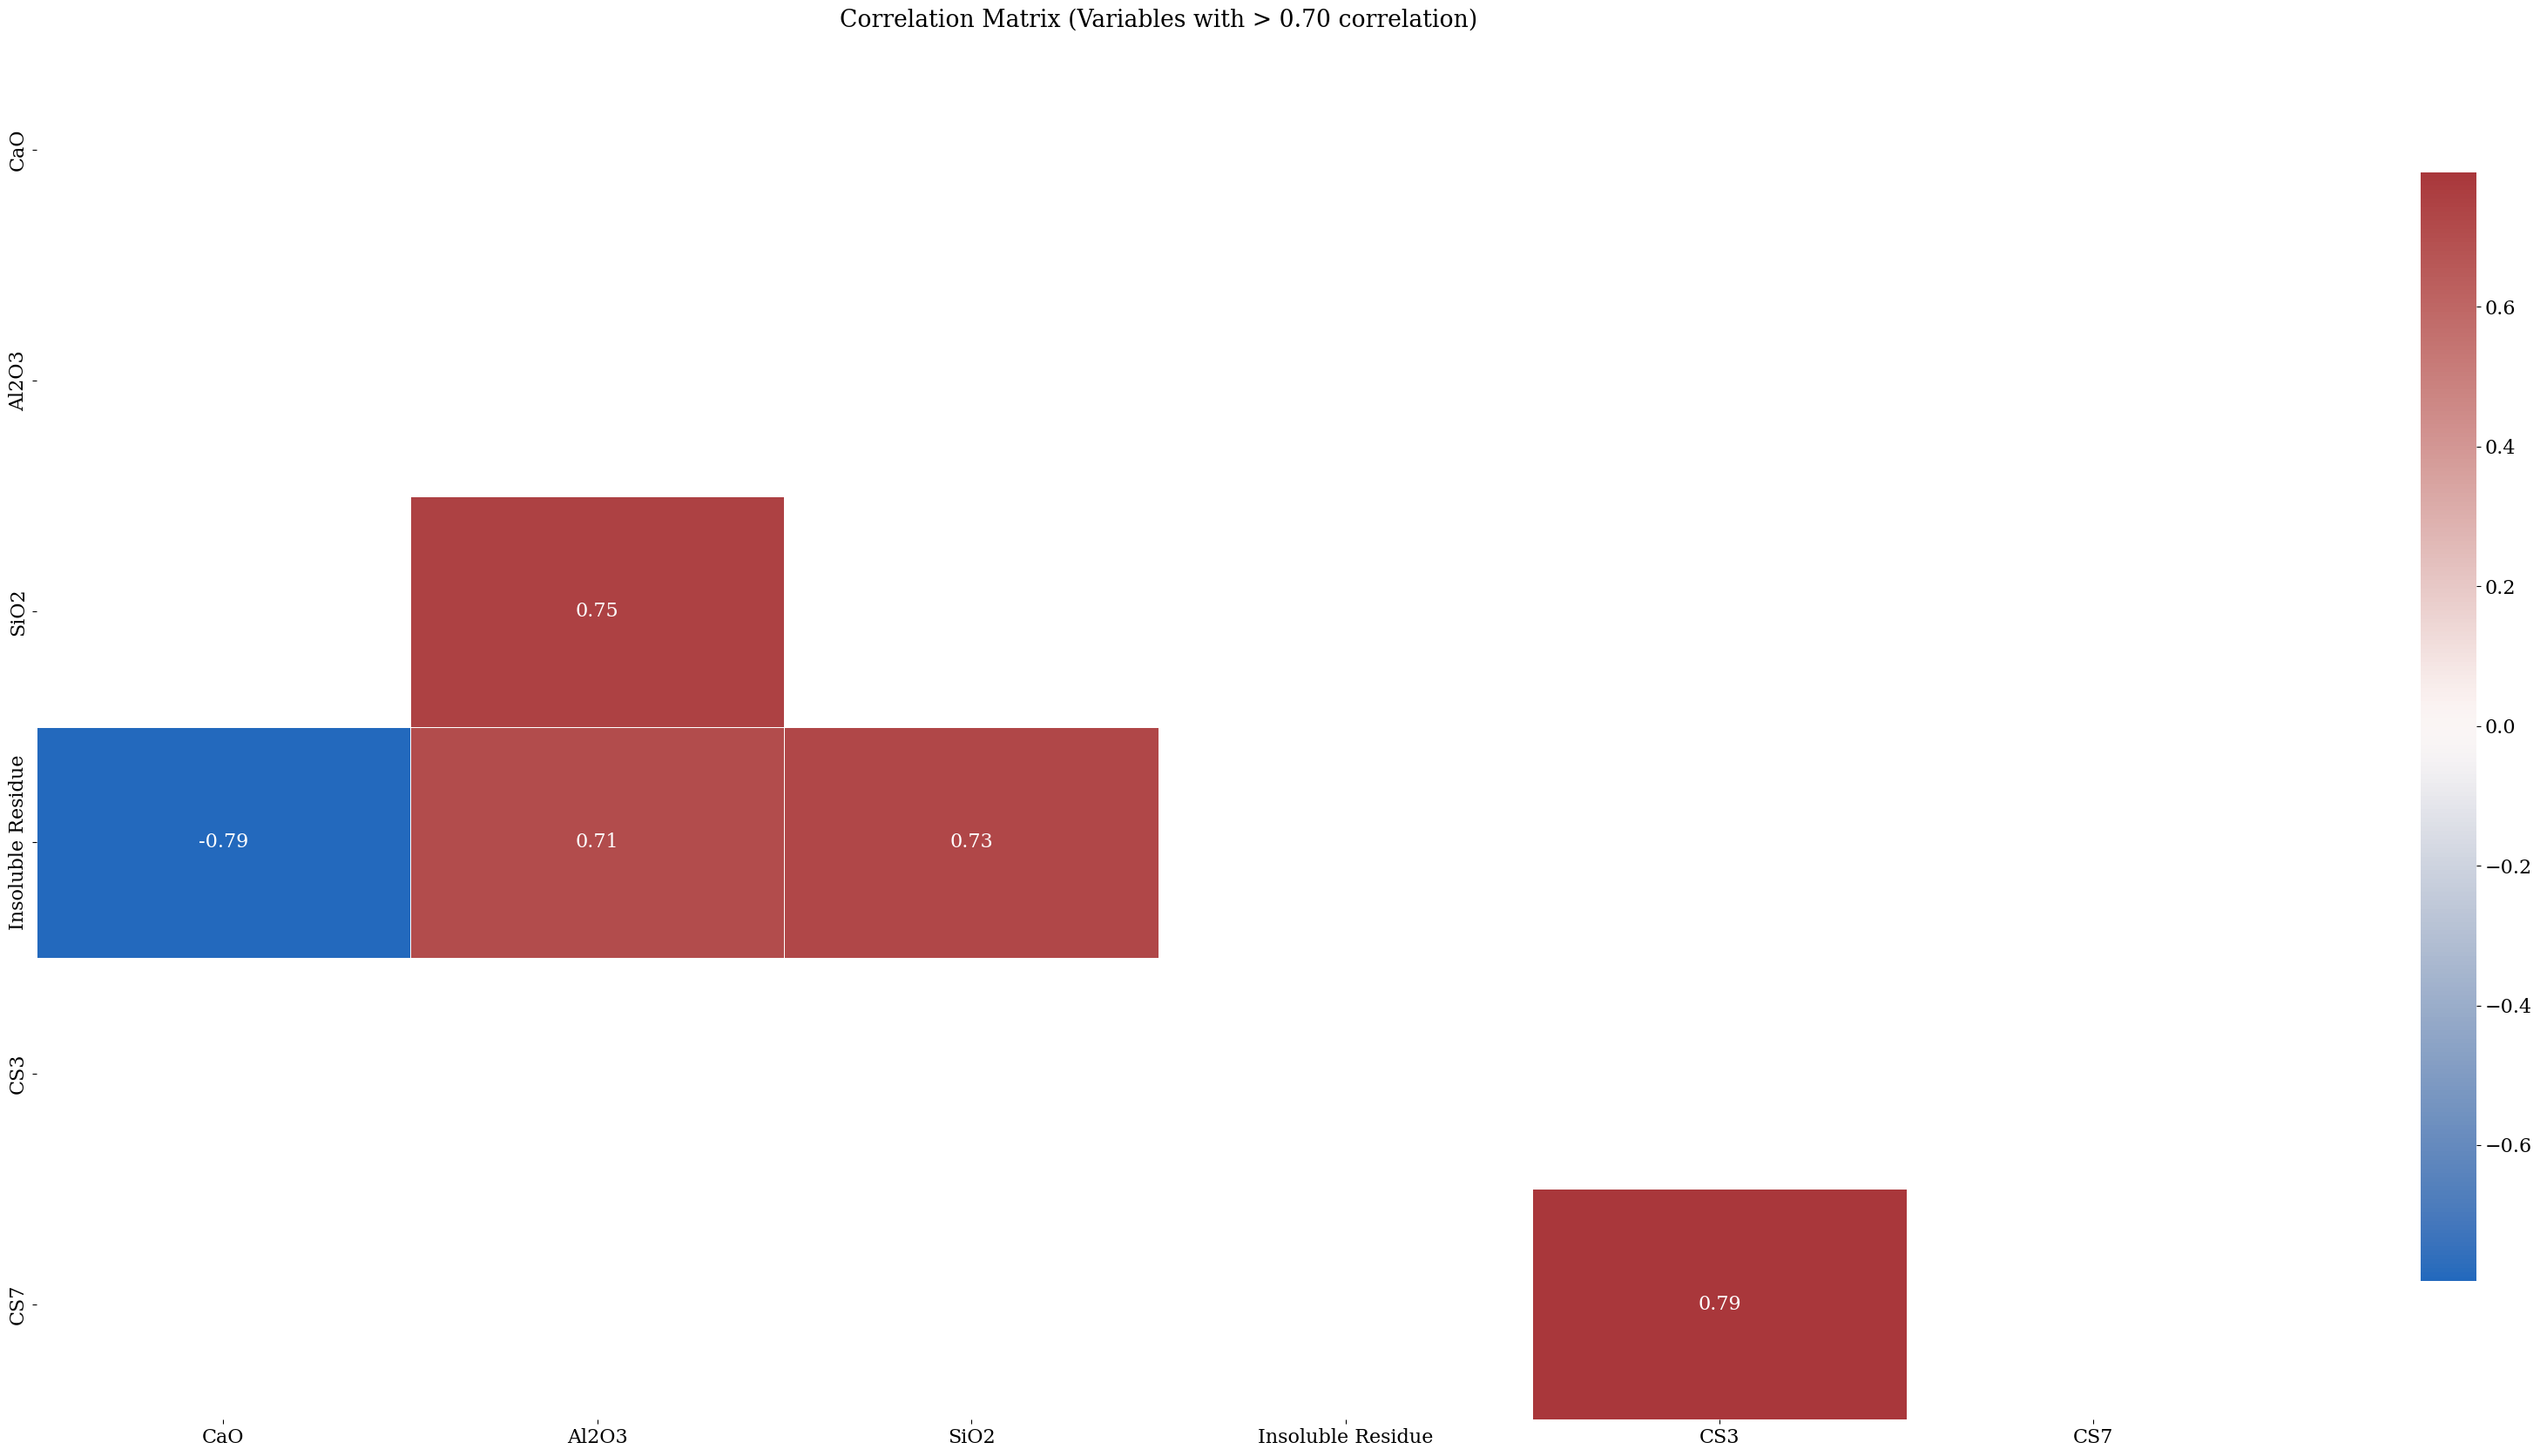

<IPython.core.display.Javascript object>

In [65]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [66]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CaO    Insoluble Residue    0.794658
CS3    CS7                  0.791578
Al2O3  SiO2                 0.752693
SiO2   Insoluble Residue    0.727102
Al2O3  Insoluble Residue    0.709875
dtype: float64

<IPython.core.display.Javascript object>

In [67]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.613553
CS3                   CS28    0.589301
Insoluble Residue     CS28    0.492667
SiO2                  CS28    0.485852
CaO                   CS28    0.473733
Al2O3                 CS28    0.451869
Fe2O3                 CS28    0.389240
SO3                   CS28    0.347664
Initial setting time  CS28    0.284710
Final setting time    CS28    0.278150
MgO                   CS28    0.254469
CS1                   CS28    0.159744
Loss on Ignition      CS28    0.150494
Blaine                CS28    0.135570
#200                  CS28    0.124930
#325                  CS28    0.071508
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

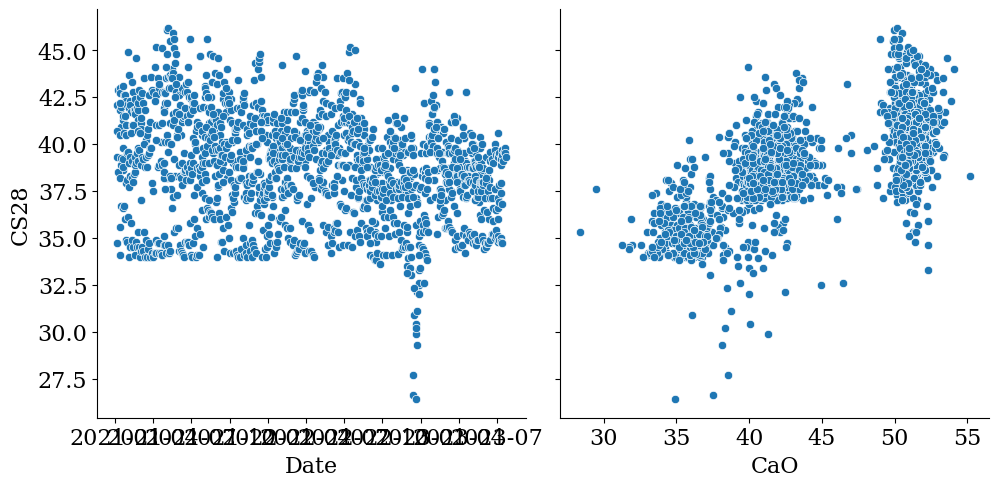

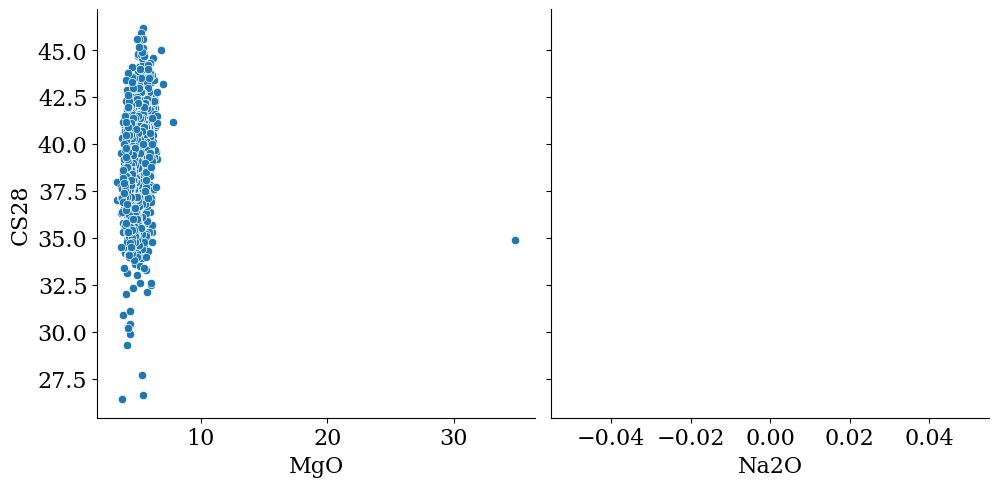

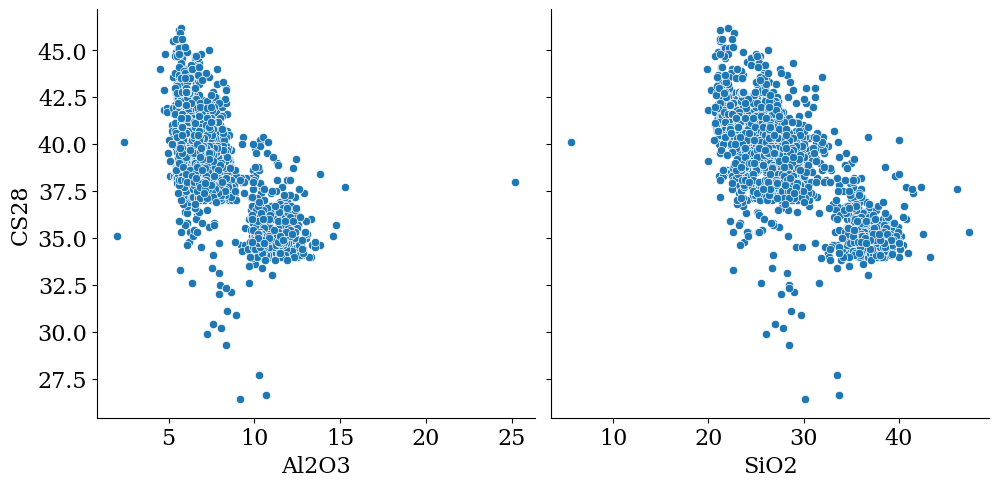

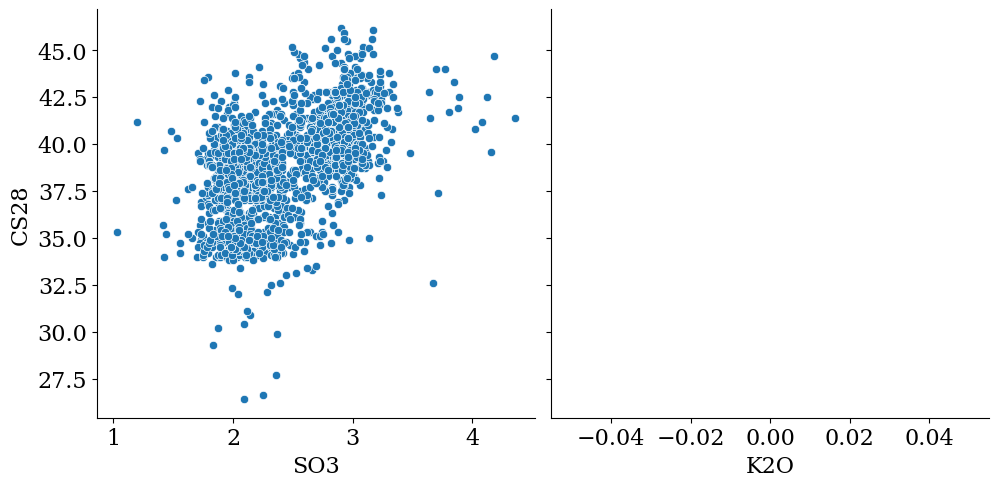

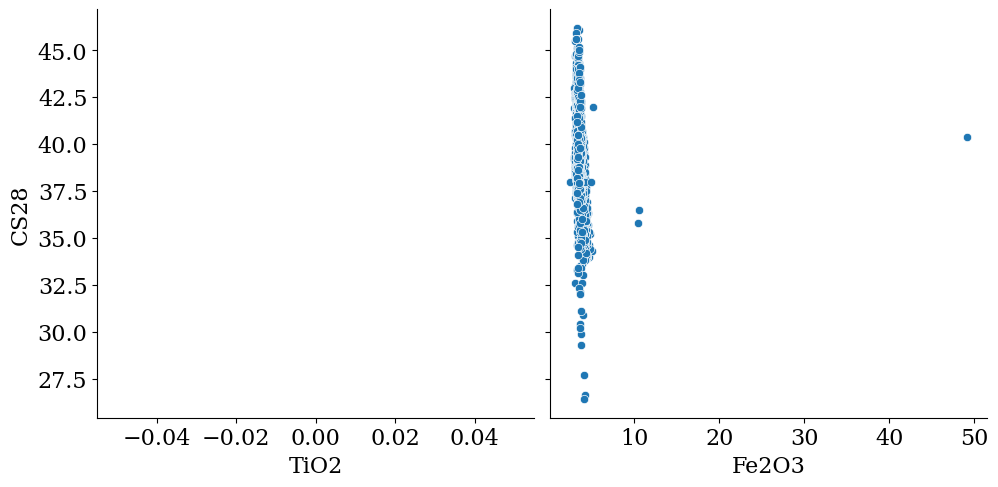

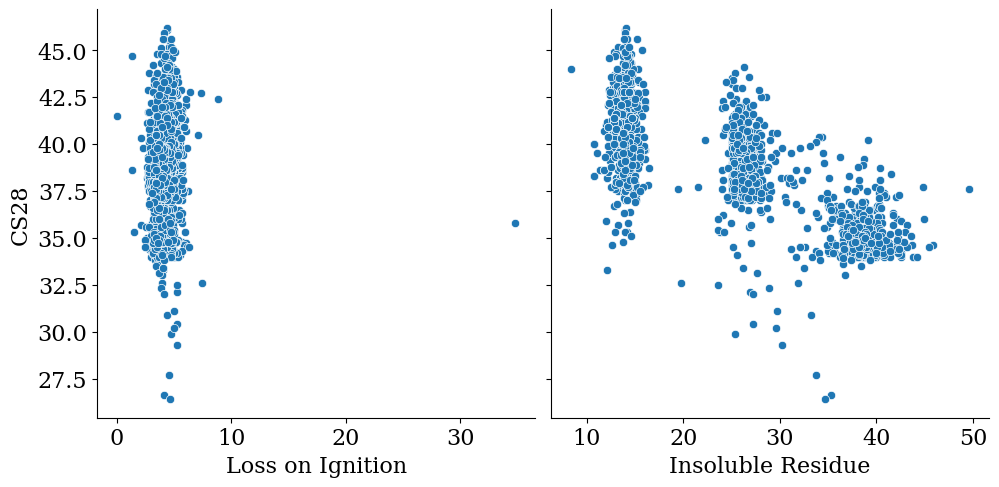

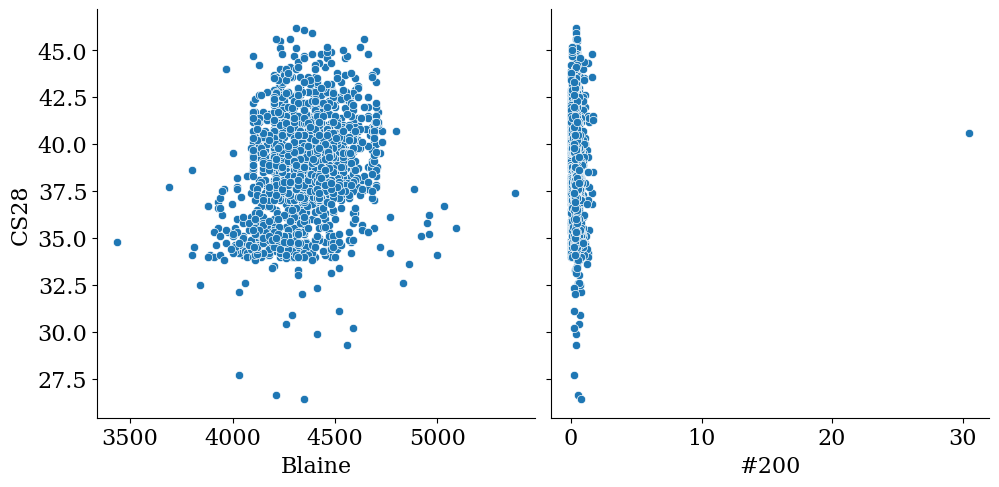

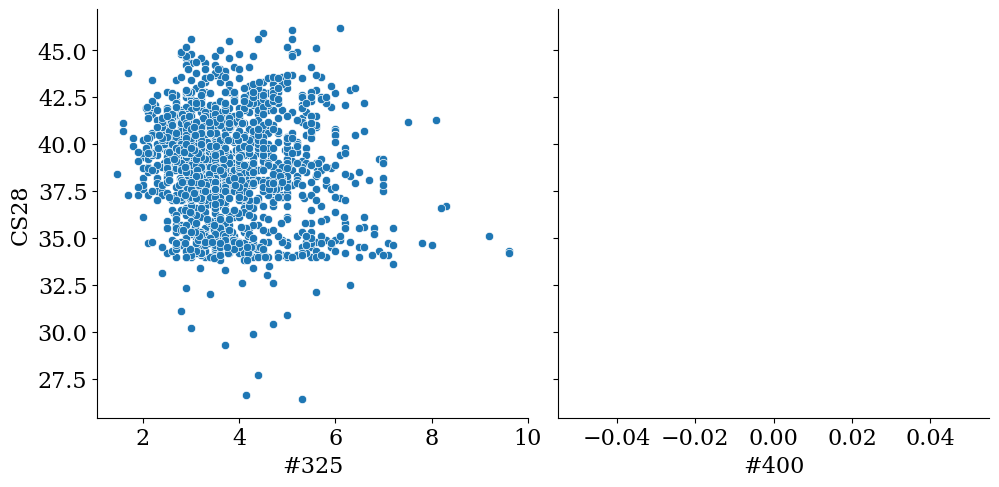

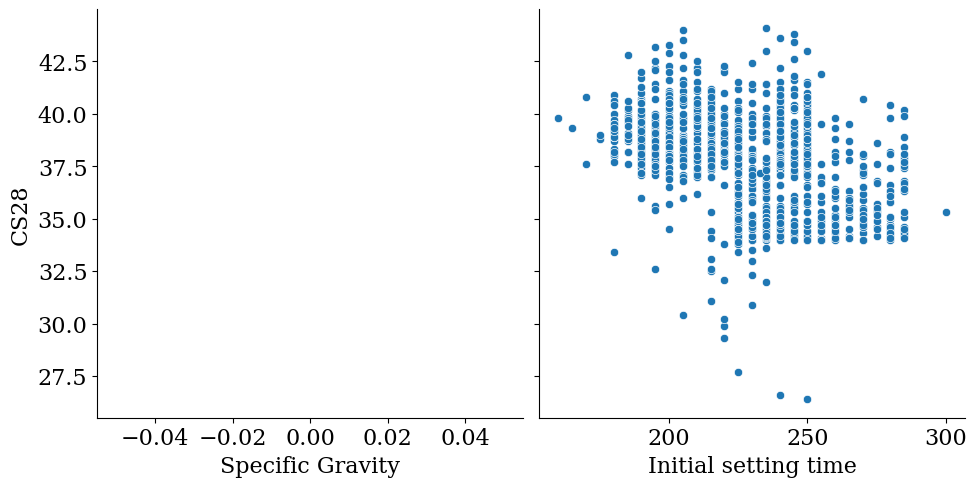

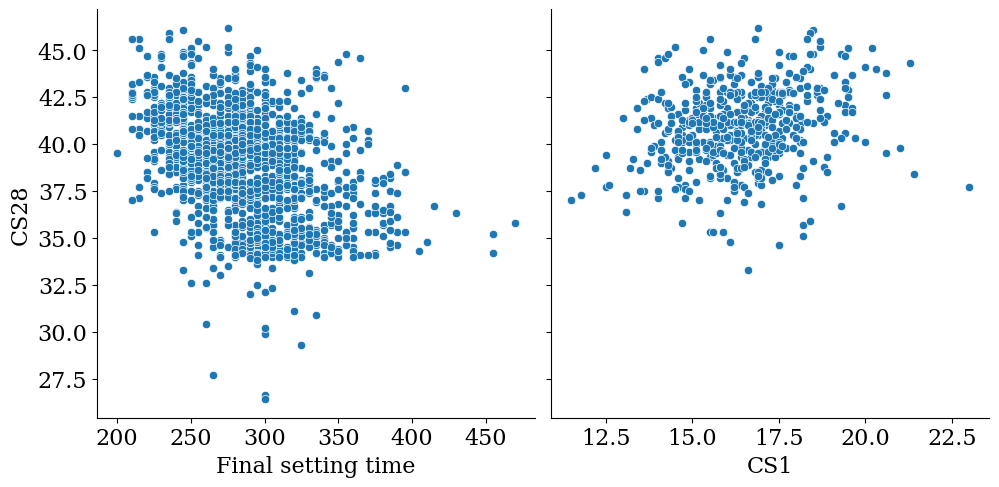

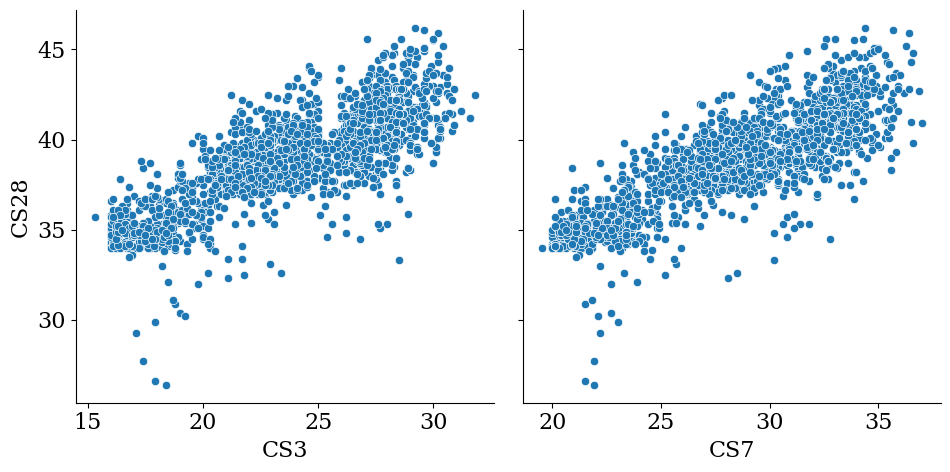

<IPython.core.display.Javascript object>

In [68]:
num_lines = 11
plots_per_line = 2

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [69]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

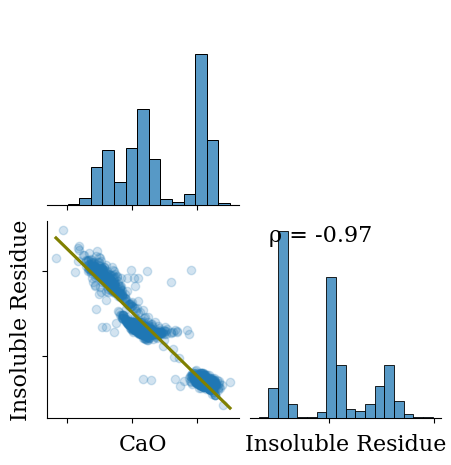

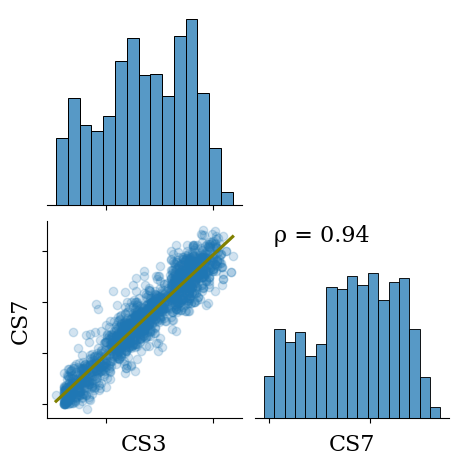

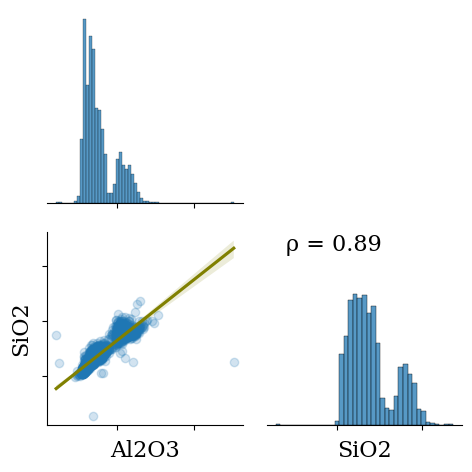

<IPython.core.display.Javascript object>

In [70]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [71]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

627 valid days out of 628


<IPython.core.display.Javascript object>

In [72]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [73]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7, 8}}

<IPython.core.display.Javascript object>

In [74]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        18
      2        20
      3        16
      4        15
      5        21
      6        21
      7        19
      8        22
      9        20
      10       17
      11       21
      12       23
2022  1        21
      2        19
      3        22
      4        19
      5        19
      6        21
      7        21
      8        22
      9        20
      10       20
      11       20
      12       22
2023  1        20
      2        19
      3        23
      4        17
      5        22
      6        19
      7        19
      8        10
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

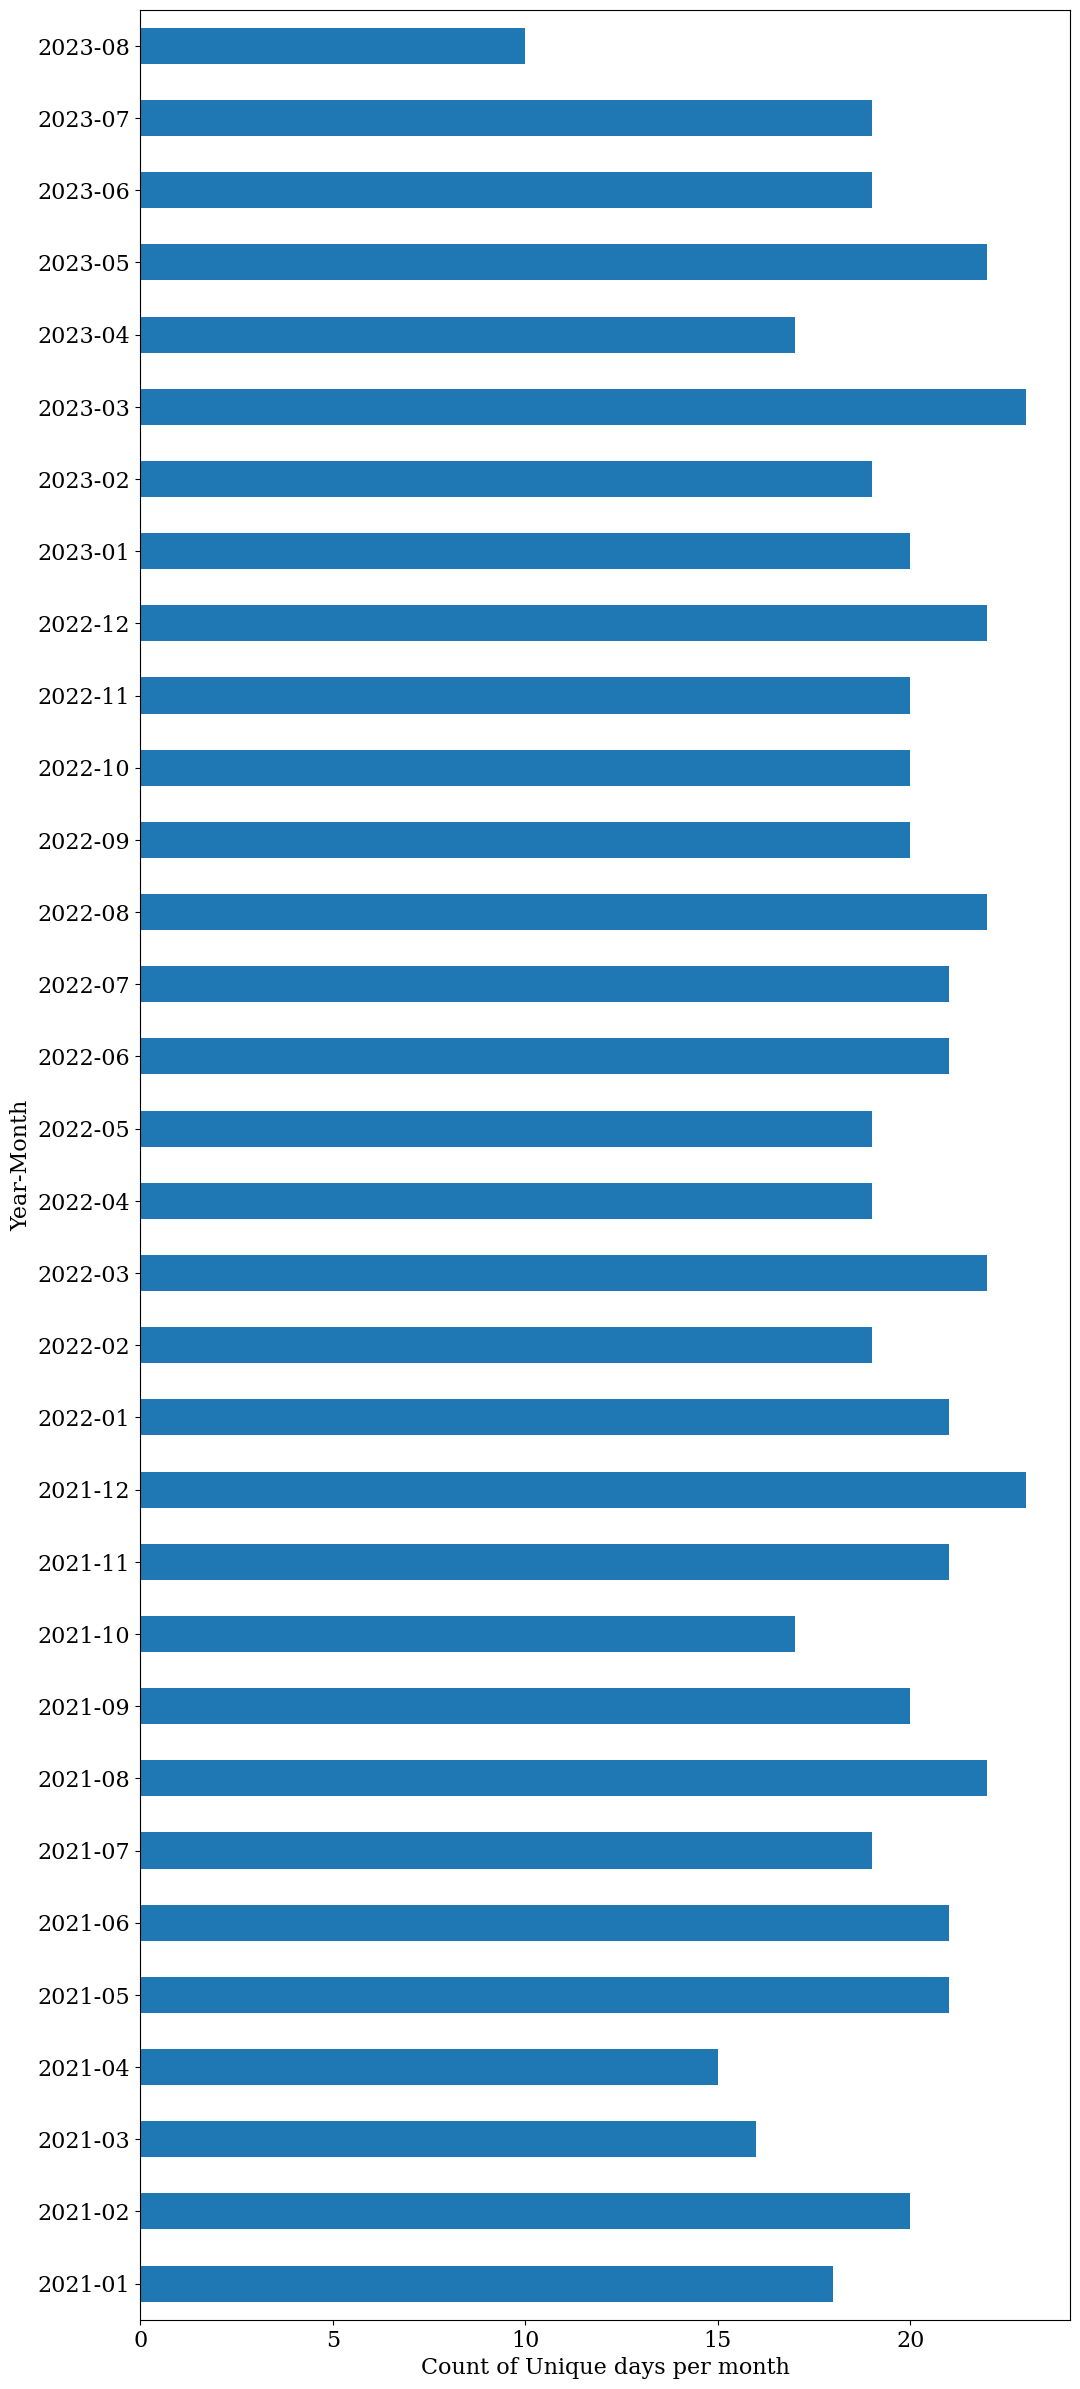

<IPython.core.display.Javascript object>

In [75]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [76]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        42
      2        51
      3        45
      4        40
      5        53
      6        52
      7        49
      8        57
      9        52
      10       43
      11       53
      12       60
2022  1        55
      2        47
      3        56
      4        46
      5        44
      6        50
      7        54
      8        58
      9        51
      10       51
      11       52
      12       51
2023  1        59
      2        56
      3        78
      4        57
      5        54
      6        40
      7        49
      8        17
Name: size, dtype: int64


<IPython.core.display.Javascript object>

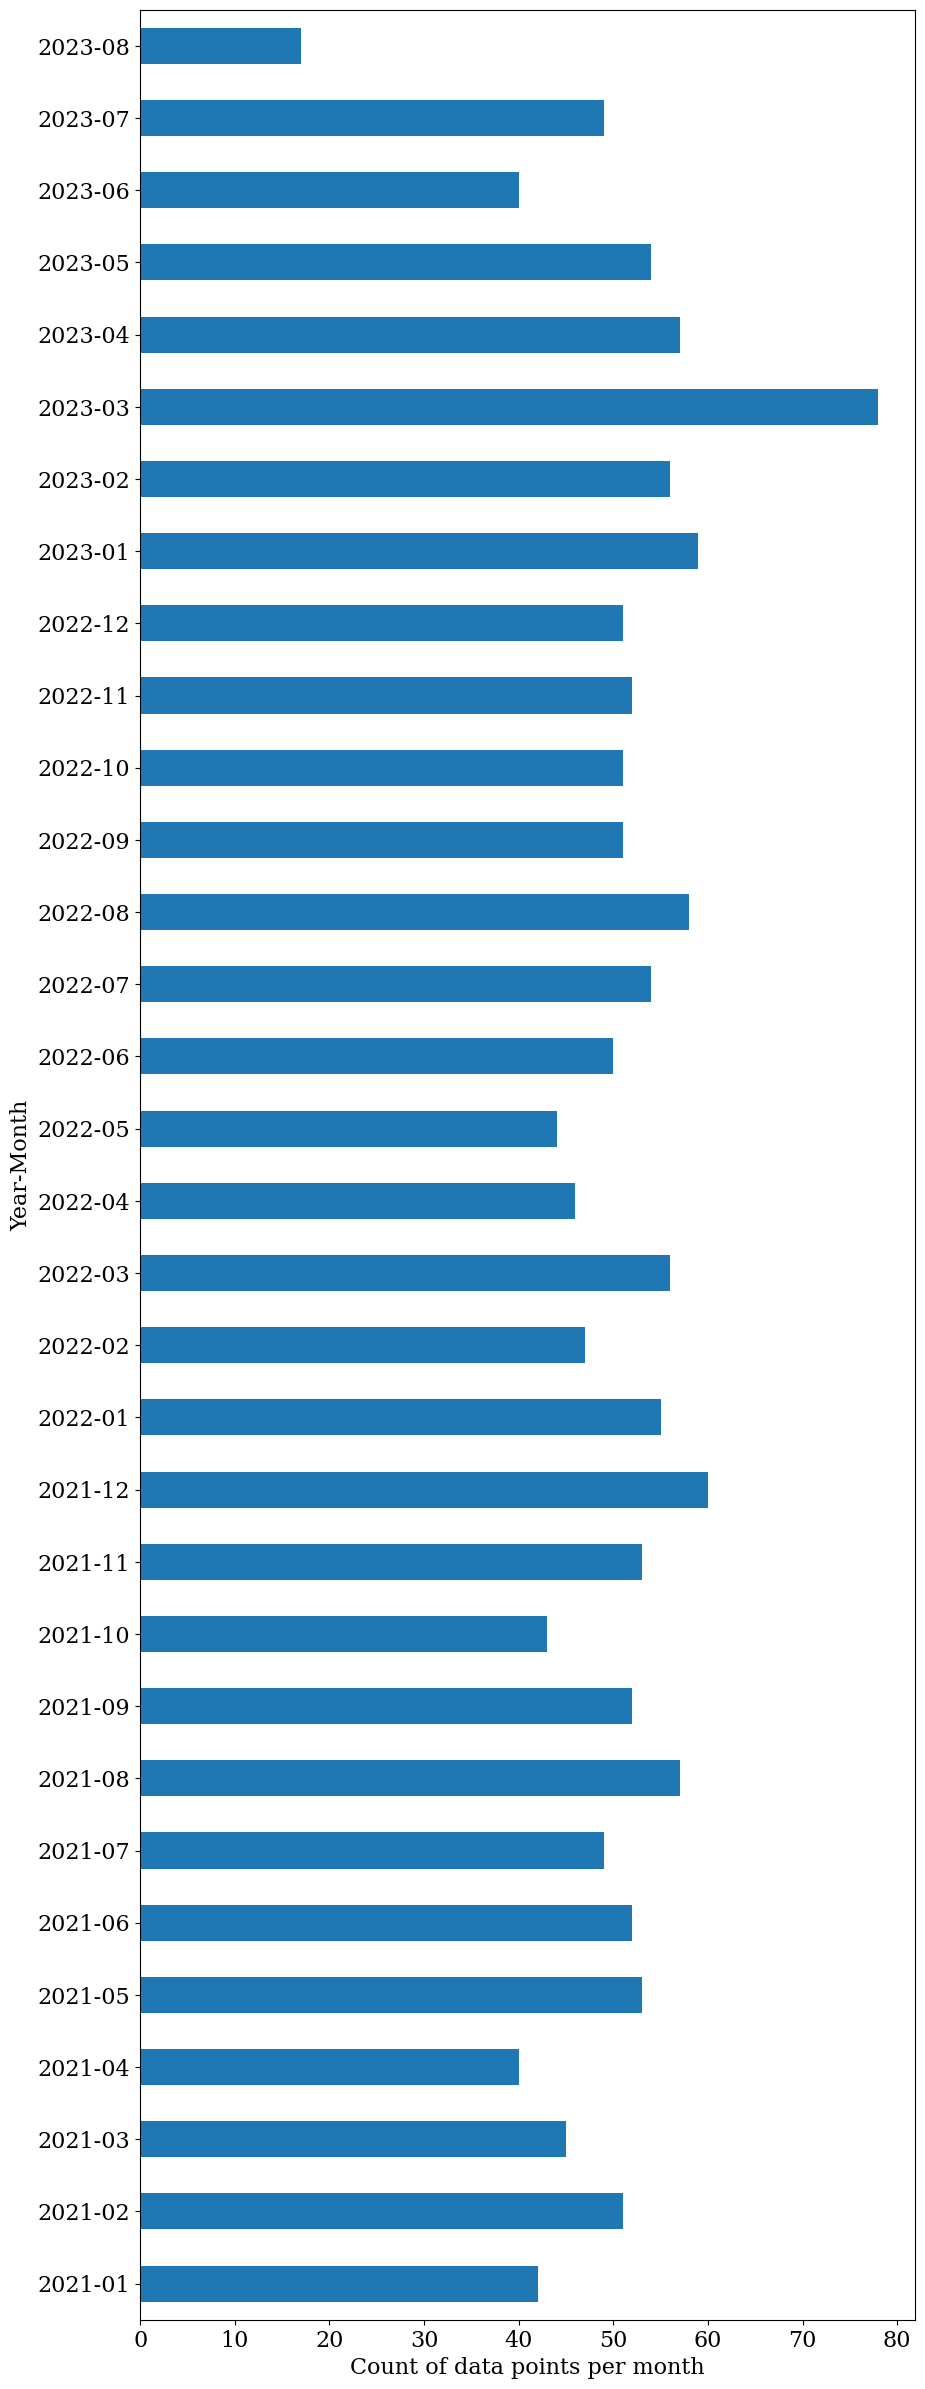

<IPython.core.display.Javascript object>

In [77]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [78]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-8 has the minimum number of days with samples - 17
2023-3 has the maximum number of days with samples - 78


<IPython.core.display.Javascript object>

In [79]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 49, 2022: 51, 2023: 51}

Mean number of observations - all years
50


<IPython.core.display.Javascript object>

In [80]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  628.000000
mean     2.582803
std      0.673838
min      1.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      4.000000

<IPython.core.display.Javascript object>

In [81]:
day_counts[["DayCount"]].value_counts()

DayCount
3           330
2           232
4            34
1            32
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [82]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
483  2023      1    6         4
484  2023      1    9         4
486  2023      1   11         4
488  2023      1   13         4
489  2023      1   16         4
495  2023      1   25         4
496  2023      1   27         4
499  2023      2    1         4
501  2023      2    3         4
502  2023      2    6         4
504  2023      2    8         4
511  2023      2   17         4
512  2023      2   20         4
515  2023      2   24         4
518  2023      3    1         4
520  2023      3    3         4
521  2023      3    6         4
523  2023      3    8         4
525  2023      3   10         4
526  2023      3   13         4
528  2023      3   15         4
531  2023      3   20         4
533  2023      3   22         4
535  2023      3   24         4
536  2023      3   27         4
538  2023      3   29         4
540  2023      3   31         4
543  2023      4    5         4
545  2023      4   10         4
547  2023      4   12         4
549  2023      4   14         4
550  2023      4   17         4
552  2023      4   19         4
554  2023      4   24         4

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

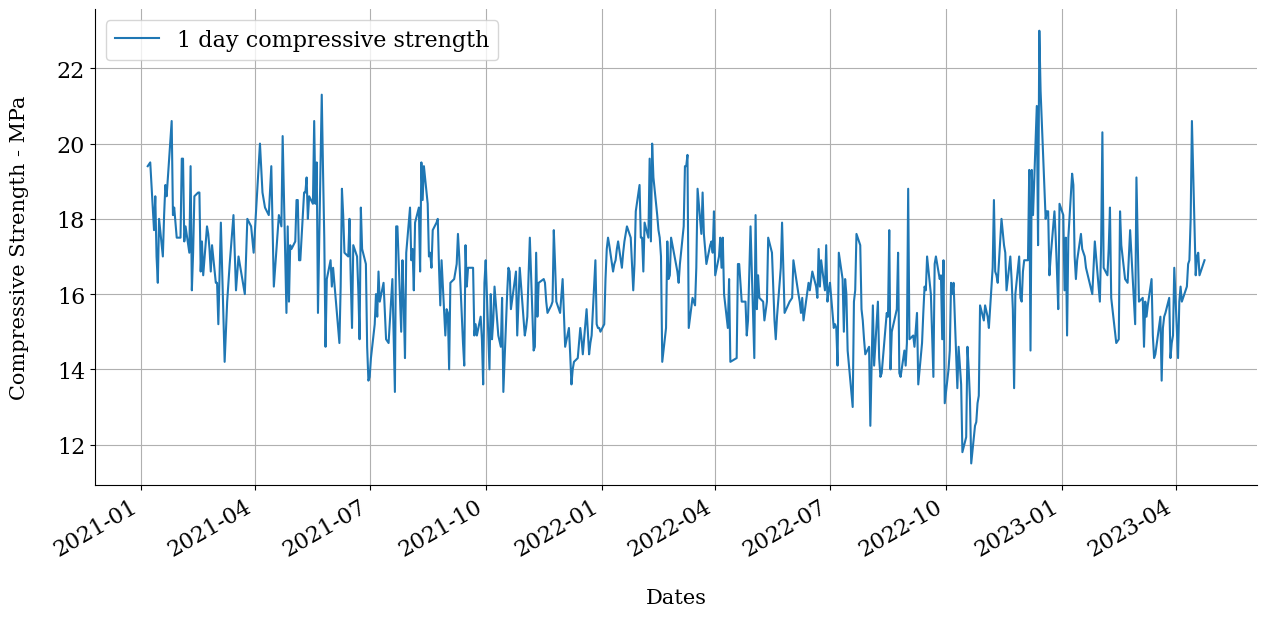

<IPython.core.display.Javascript object>

In [83]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

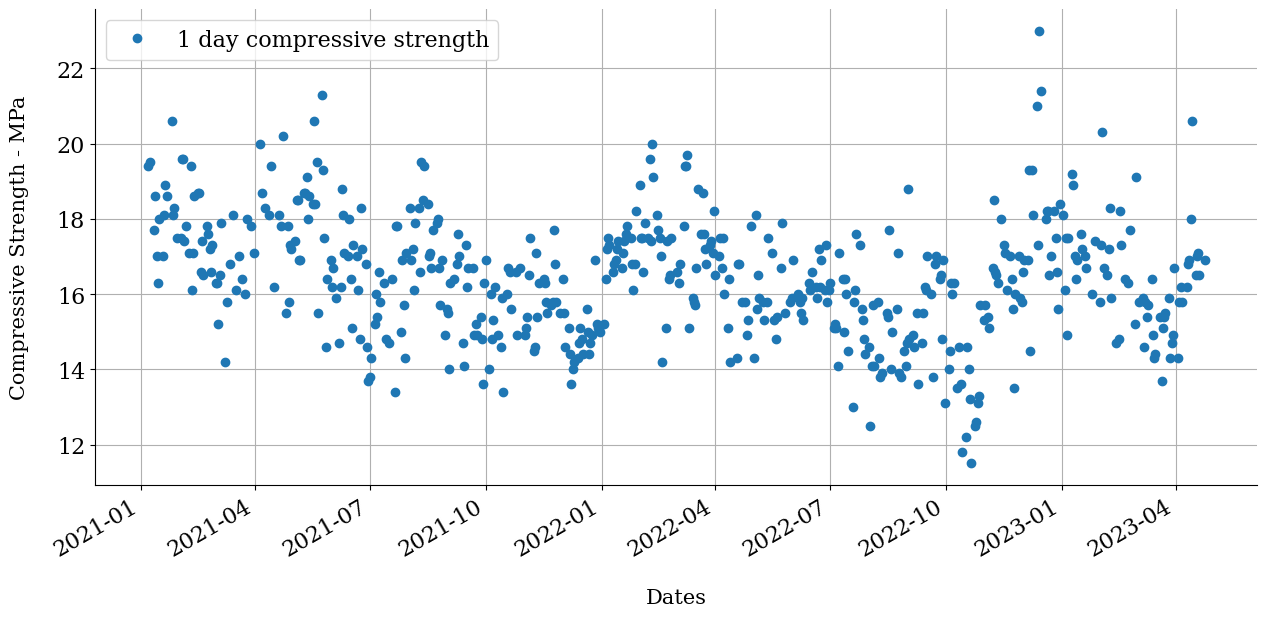

<IPython.core.display.Javascript object>

In [84]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

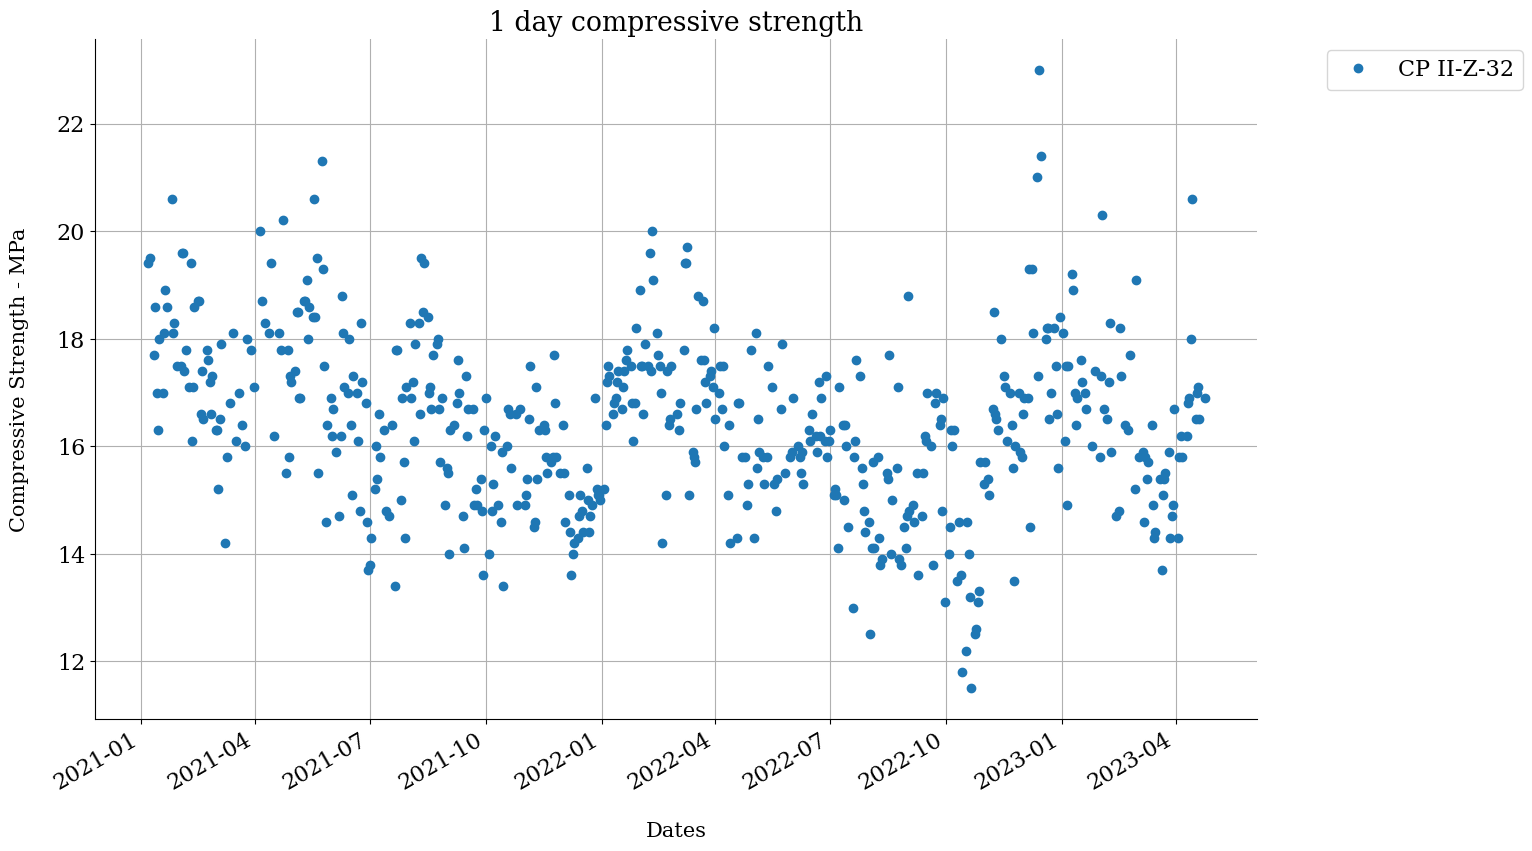

<IPython.core.display.Javascript object>

In [85]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

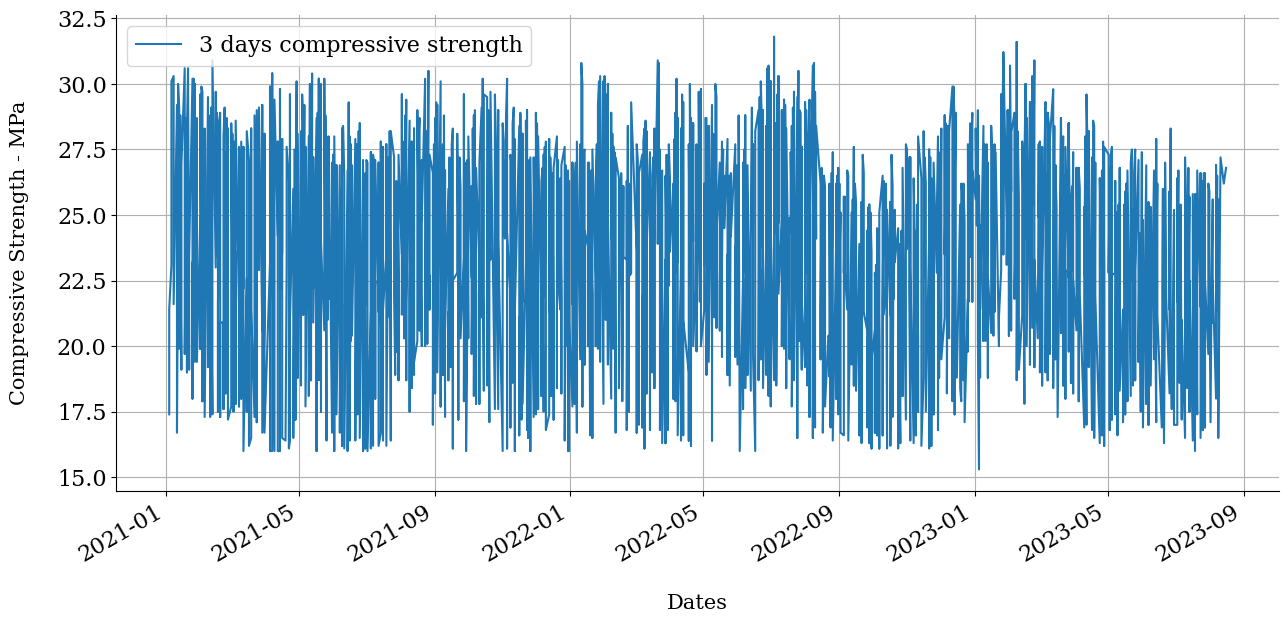

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

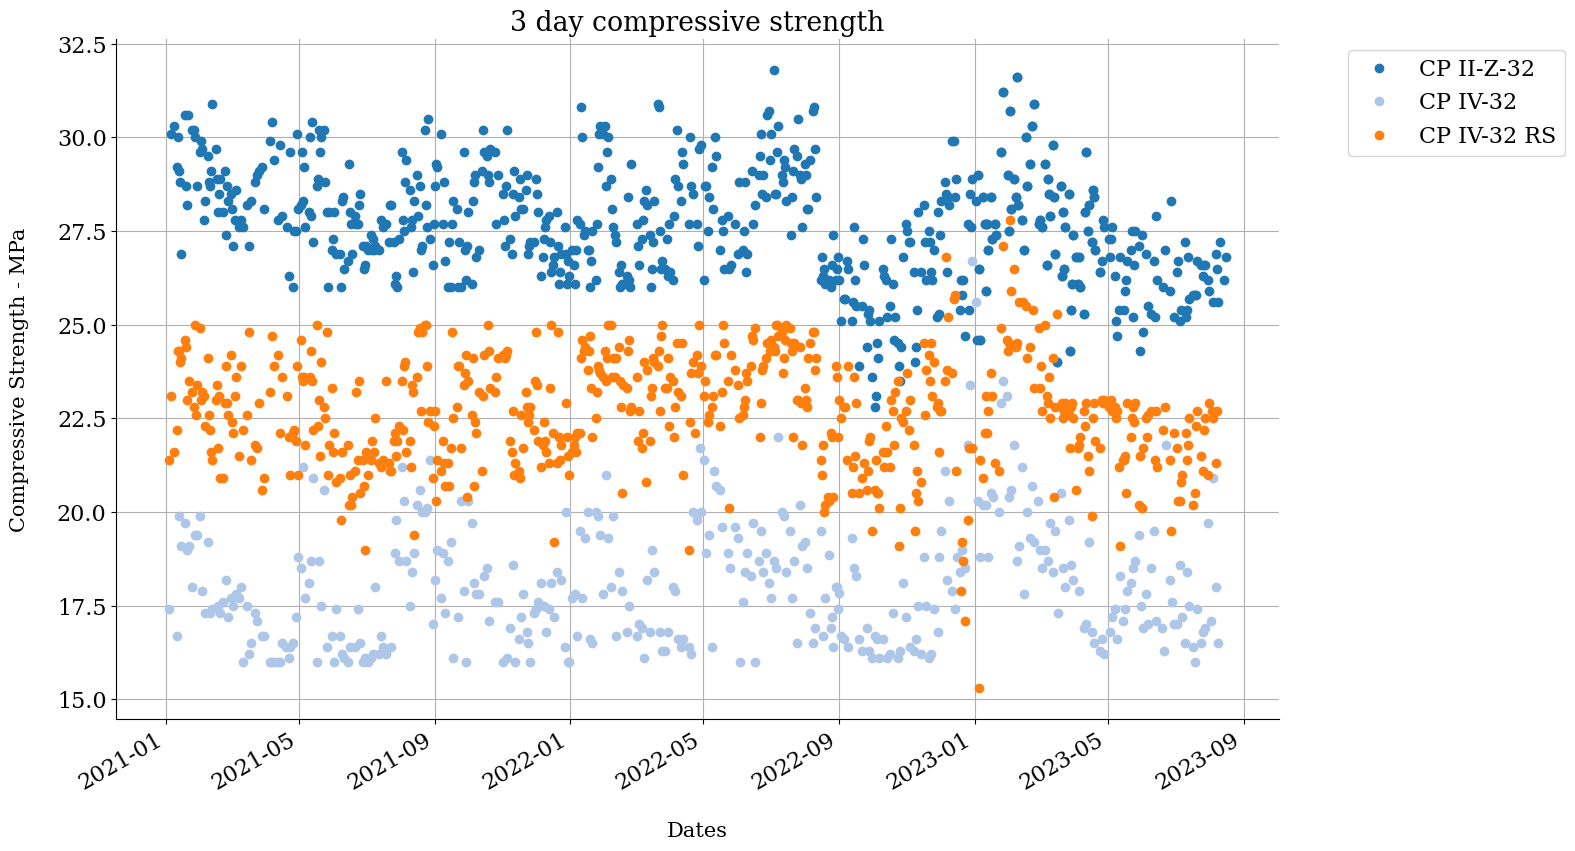

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

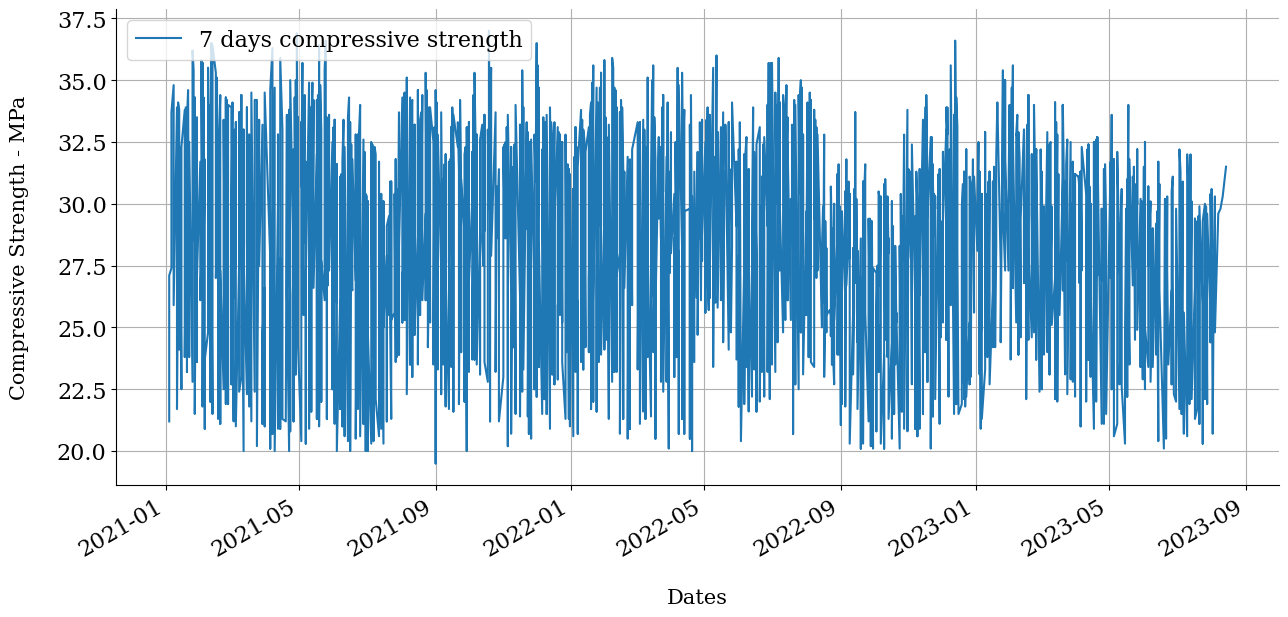

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

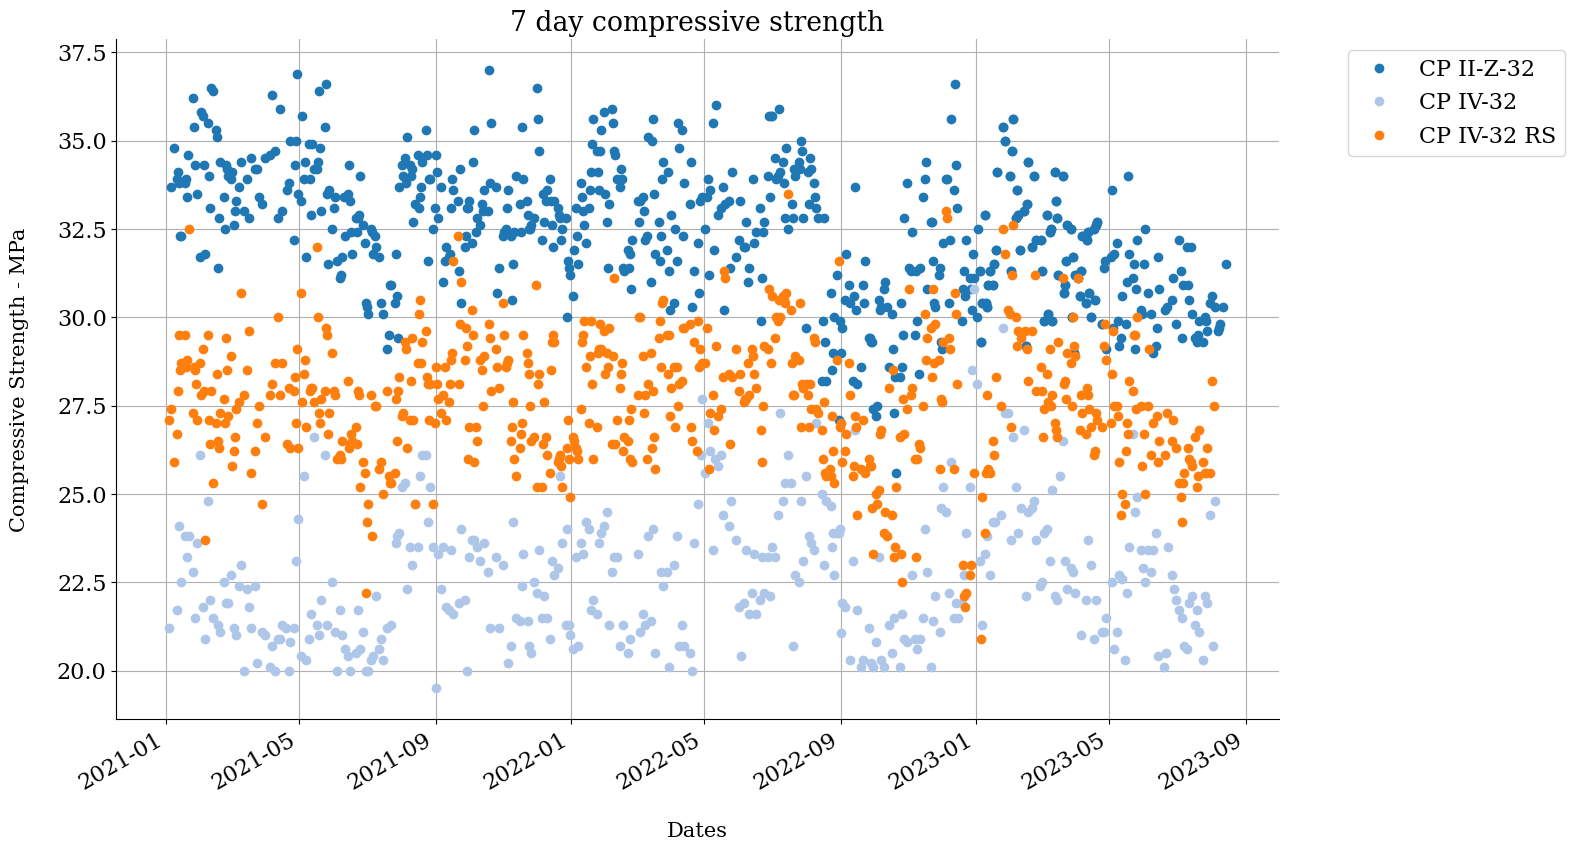

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

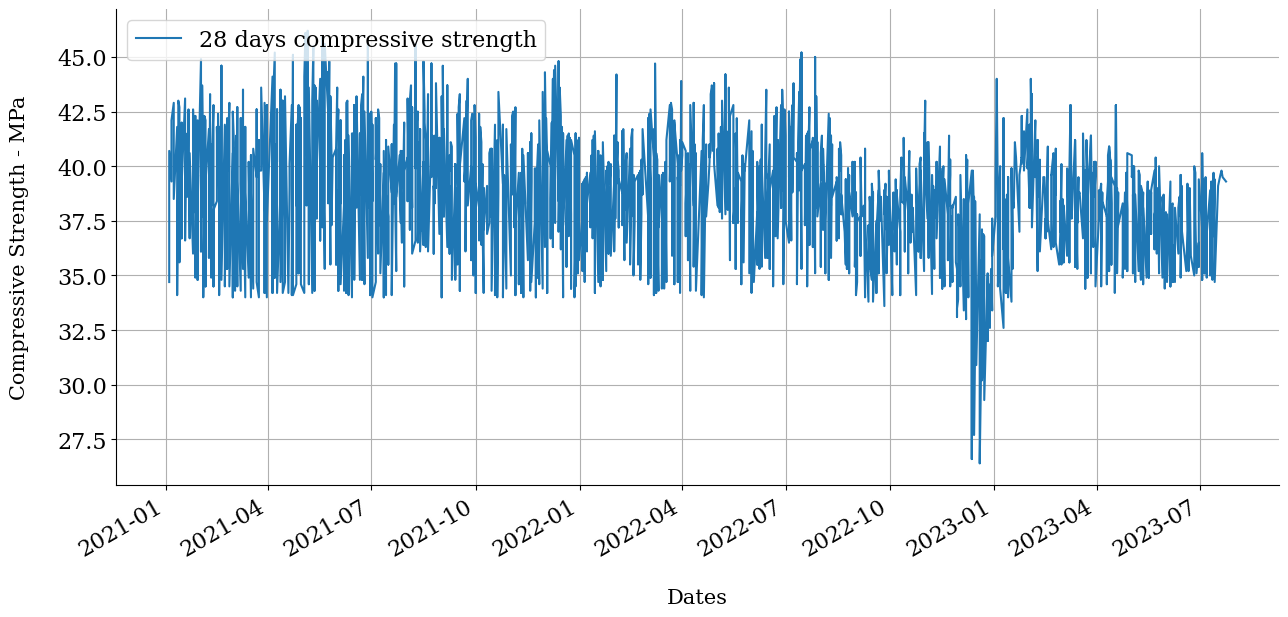

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

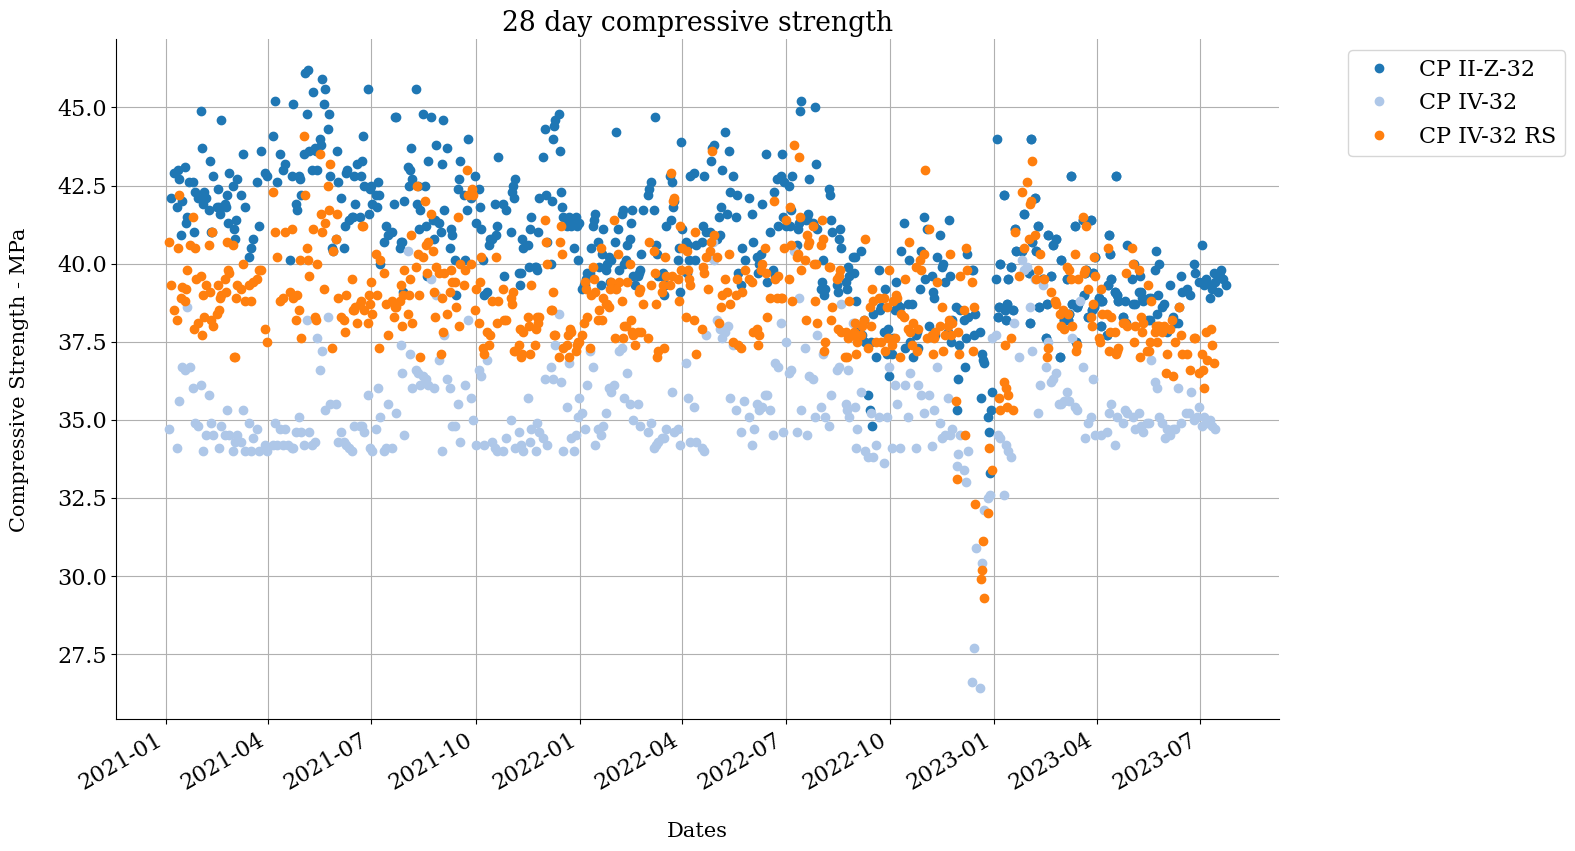

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()